# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:05:31.996244: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:05:35.958173
2025-04-14 21:05:35.958173


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:05:29"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

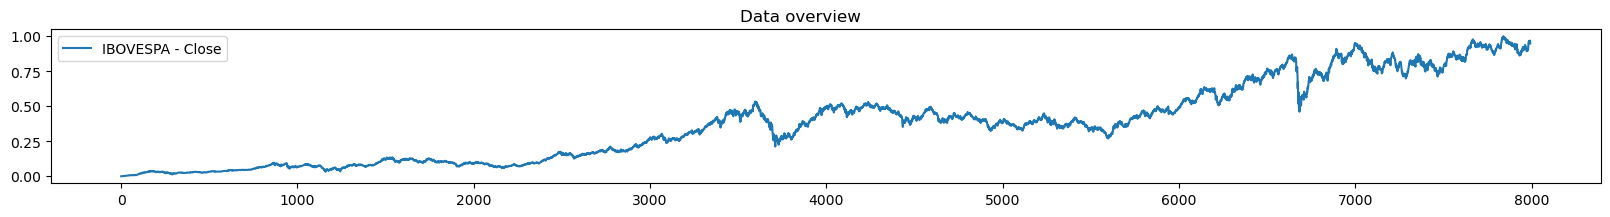

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

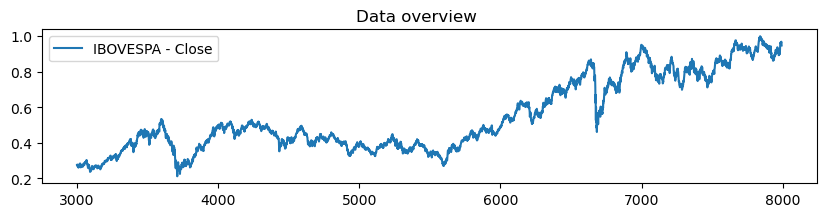

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

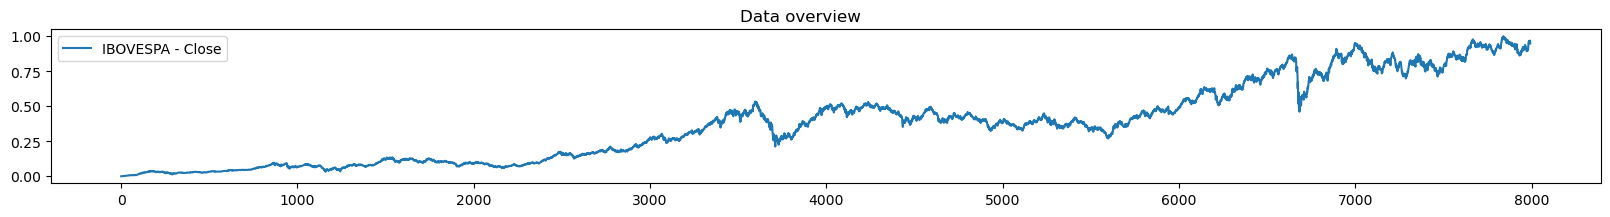

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

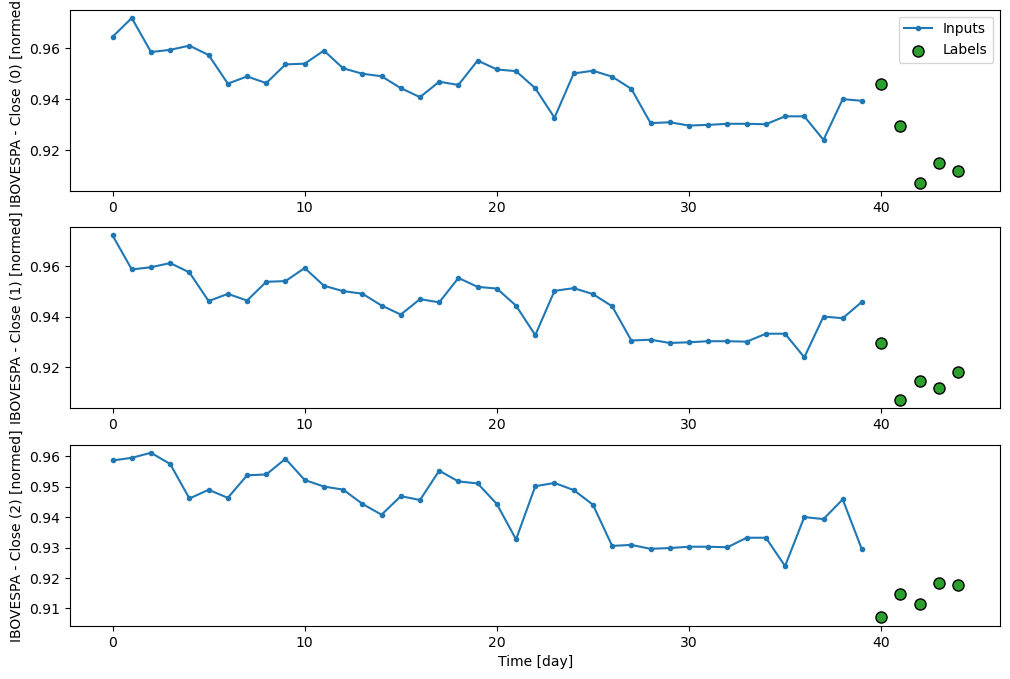

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:46 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.1340 - mean_squared_error: 6.2257e-05 - root_mean_squared_error: 0.0077  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 63.3988 - mean_squared_error: 6.9424e-05 - root_mean_squared_error: 0.0082

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 55.9889 - mean_squared_error: 6.7890e-05 - root_mean_squared_error: 0.0082

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 51.1162 - mean_squared_error: 6.5525e-05 - root_mean_squared_error: 0.0080

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 47.1047 - mean_squared_error: 6.2209e-05 - root_mean_squared_error: 0.0078

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 44.0366 - mean_squared_error: 5.9653e-05 - root_mean_squared_error: 0.0077

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 41.5583 - mean_squared_error: 5.7375e-05 - root_mean_squared_error: 0.0075

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 39.3669 - mean_squared_error: 5.5083e-05 - root_mean_squared_error: 0.0073

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 37.4496 - mean_squared_error: 5.2975e-05 - root_mean_squared_error: 0.0072

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 35.7775 - mean_squared_error: 5.1116e-05 - root_mean_squared_error: 0.0071

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 34.3233 - mean_squared_error: 4.9756e-05 - root_mean_squared_error: 0.0070

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.1647 - mean_squared_error: 5.0899e-05 - root_mean_squared_error: 0.0070

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 32.2358 - mean_squared_error: 5.5466e-05 - root_mean_squared_error: 0.0073

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 31.4357 - mean_squared_error: 6.0926e-05 - root_mean_squared_error: 0.0076

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 30.8257 - mean_squared_error: 6.8714e-05 - root_mean_squared_error: 0.0080

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 30.2450 - mean_squared_error: 7.5227e-05 - root_mean_squared_error: 0.0083

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 29.7063 - mean_squared_error: 8.0777e-05 - root_mean_squared_error: 0.0086

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.2827 - mean_squared_error: 8.7862e-05 - root_mean_squared_error: 0.0089

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 28.9752 - mean_squared_error: 9.6516e-05 - root_mean_squared_error: 0.0093

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 28.6898 - mean_squared_error: 1.0437e-04 - root_mean_squared_error: 0.0096

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 28.4064 - mean_squared_error: 1.1116e-04 - root_mean_squared_error: 0.0099

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.1287 - mean_squared_error: 1.1730e-04 - root_mean_squared_error: 0.0101

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 27.8921 - mean_squared_error: 1.2541e-04 - root_mean_squared_error: 0.0105

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.6710 - mean_squared_error: 1.3360e-04 - root_mean_squared_error: 0.0108

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 27.4489 - mean_squared_error: 1.4098e-04 - root_mean_squared_error: 0.0111

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 27.2539 - mean_squared_error: 1.4889e-04 - root_mean_squared_error: 0.0113

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 27.0566 - mean_squared_error: 1.5605e-04 - root_mean_squared_error: 0.0116

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 26.8521 - mean_squared_error: 1.6233e-04 - root_mean_squared_error: 0.0118

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 26.6497 - mean_squared_error: 1.6797e-04 - root_mean_squared_error: 0.0121

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 26.4517 - mean_squared_error: 1.7307e-04 - root_mean_squared_error: 0.0122

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.2544 - mean_squared_error: 1.7763e-04 - root_mean_squared_error: 0.0124

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.0670 - mean_squared_error: 1.8187e-04 - root_mean_squared_error: 0.0126

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 25.9104 - mean_squared_error: 1.8633e-04 - root_mean_squared_error: 0.0128

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 25.7635 - mean_squared_error: 1.9051e-04 - root_mean_squared_error: 0.0129

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 25.6186 - mean_squared_error: 1.9433e-04 - root_mean_squared_error: 0.0131

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 25.4854 - mean_squared_error: 1.9815e-04 - root_mean_squared_error: 0.0132

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 25.3636 - mean_squared_error: 2.0223e-04 - root_mean_squared_error: 0.0133

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 25.2559 - mean_squared_error: 2.0748e-04 - root_mean_squared_error: 0.0135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 25.1536 - mean_squared_error: 2.1310e-04 - root_mean_squared_error: 0.0137

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 25.1044 - mean_squared_error: 2.1597e-04 - root_mean_squared_error: 0.0138

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 25.0038 - mean_squared_error: 2.2140e-04 - root_mean_squared_error: 0.0140

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 24.9001 - mean_squared_error: 2.2643e-04 - root_mean_squared_error: 0.0141

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 24.7947 - mean_squared_error: 2.3117e-04 - root_mean_squared_error: 0.0143

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 24.6892 - mean_squared_error: 2.3569e-04 - root_mean_squared_error: 0.0144

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 24.5832 - mean_squared_error: 2.4001e-04 - root_mean_squared_error: 0.0146

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 24.4778 - mean_squared_error: 2.4431e-04 - root_mean_squared_error: 0.0147

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 24.3771 - mean_squared_error: 2.4961e-04 - root_mean_squared_error: 0.0149

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 24.2782 - mean_squared_error: 2.5530e-04 - root_mean_squared_error: 0.0150

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 24.1780 - mean_squared_error: 2.6070e-04 - root_mean_squared_error: 0.0152

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 24.0774 - mean_squared_error: 2.6597e-04 - root_mean_squared_error: 0.0154

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 23.9774 - mean_squared_error: 2.7133e-04 - root_mean_squared_error: 0.0155

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 23.8765 - mean_squared_error: 2.7649e-04 - root_mean_squared_error: 0.0157

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 23.7757 - mean_squared_error: 2.8189e-04 - root_mean_squared_error: 0.0158

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 23.6756 - mean_squared_error: 2.8758e-04 - root_mean_squared_error: 0.0160

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 23.5747 - mean_squared_error: 2.9312e-04 - root_mean_squared_error: 0.0161

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 23.4727 - mean_squared_error: 2.9843e-04 - root_mean_squared_error: 0.0163

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 23.3736 - mean_squared_error: 3.0491e-04 - root_mean_squared_error: 0.0164

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 23.2859 - mean_squared_error: 3.1604e-04 - root_mean_squared_error: 0.0167

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 23.2037 - mean_squared_error: 3.2843e-04 - root_mean_squared_error: 0.0169

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 23.1233 - mean_squared_error: 3.4107e-04 - root_mean_squared_error: 0.0172

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 23.0483 - mean_squared_error: 3.5658e-04 - root_mean_squared_error: 0.0175

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 22.9810 - mean_squared_error: 3.7958e-04 - root_mean_squared_error: 0.0179

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 22.9208 - mean_squared_error: 4.1074e-04 - root_mean_squared_error: 0.0184

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 22.8644 - mean_squared_error: 4.4528e-04 - root_mean_squared_error: 0.0189

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 22.8115 - mean_squared_error: 4.8368e-04 - root_mean_squared_error: 0.0195

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 22.7586 - mean_squared_error: 5.2121e-04 - root_mean_squared_error: 0.0200

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 22.7058 - mean_squared_error: 5.5799e-04 - root_mean_squared_error: 0.0205

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 22.6517 - mean_squared_error: 5.9332e-04 - root_mean_squared_error: 0.0210

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 22.5992 - mean_squared_error: 6.2847e-04 - root_mean_squared_error: 0.0215

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 22.5479 - mean_squared_error: 6.6321e-04 - root_mean_squared_error: 0.0220

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 22.4956 - mean_squared_error: 6.9669e-04 - root_mean_squared_error: 0.0224

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 22.4439 - mean_squared_error: 7.2964e-04 - root_mean_squared_error: 0.0229

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 22.3910 - mean_squared_error: 7.6123e-04 - root_mean_squared_error: 0.0233

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 22.3369 - mean_squared_error: 7.9150e-04 - root_mean_squared_error: 0.0238

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 22.2815 - mean_squared_error: 8.2047e-04 - root_mean_squared_error: 0.0242

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 22.2261 - mean_squared_error: 8.4846e-04 - root_mean_squared_error: 0.0246

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 22.1721 - mean_squared_error: 8.7597e-04 - root_mean_squared_error: 0.0250

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 22.1175 - mean_squared_error: 9.0245e-04 - root_mean_squared_error: 0.0253

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 22.0617 - mean_squared_error: 9.2780e-04 - root_mean_squared_error: 0.0257

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 22.0054 - mean_squared_error: 9.5215e-04 - root_mean_squared_error: 0.0260

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 21.9499 - mean_squared_error: 9.7594e-04 - root_mean_squared_error: 0.0264

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 21.8957 - mean_squared_error: 9.9956e-04 - root_mean_squared_error: 0.0267

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 21.8412 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0270    

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 21.7861 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 21.7304 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 21.6760 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0280

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 21.6236 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 21.5980 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 21.5723 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 21.5464 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 21.5205 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 21.4950 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0290

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 21.4449 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 21.4203 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 21.3962 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 21.3724 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 21.3253 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0299

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 21.2790 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 21.2560 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0303

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 21.2331 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 21.2103 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 21.1873 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 21.1645 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 21.1421 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 21.1202 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 21.0985 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 21.0768 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 21.0333 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0316

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 20.9897 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 20.9679 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 20.9243 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 20.8804 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 20.8373 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 20.7975 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 20.7586 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 20.7391 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 20.7005 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 20.6814 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 20.6626 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 20.6256 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 20.6073 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 20.5703 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 20.5517 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 20.5329 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 20.4953 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 20.4577 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 20.4197 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 20.4006 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 20.3814 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 20.3621 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 20.3235 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 20.2851 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 20.2660 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371 - val_loss: 0.0709 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 7.5124 - val_mean_squared_error: 0.0056 - val_root_mean_squared_error: 0.0748 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.6061 - mean_absolute_error: 0.6061 - mean_absolute_percentage_error: 8143.0859 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.6061

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.6059 - mean_absolute_error: 0.6059 - mean_absolute_percentage_error: 6813.7676 - mean_squared_error: 0.3672 - root_mean_squared_error: 0.6059

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.6040 - mean_absolute_error: 0.6040 - mean_absolute_percentage_error: 6241.8911 - mean_squared_error: 0.3649 - root_mean_squared_error: 0.6041

  5/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.6013 - mean_absolute_error: 0.6013 - mean_absolute_percentage_error: 5783.1606 - mean_squared_error: 0.3617 - root_mean_squared_error: 0.6014

  6/237 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.5977 - mean_absolute_error: 0.5977 - mean_absolute_percentage_error: 5414.2734 - mean_squared_error: 0.3576 - root_mean_squared_error: 0.5979

  7/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.5933 - mean_absolute_error: 0.5933 - mean_absolute_percentage_error: 5115.1177 - mean_squared_error: 0.3527 - root_mean_squared_error: 0.5937

  8/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.5878 - mean_absolute_error: 0.5878 - mean_absolute_percentage_error: 4872.9712 - mean_squared_error: 0.3468 - root_mean_squared_error: 0.5886

 10/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.6070 - mean_absolute_error: 0.6070 - mean_absolute_percentage_error: 4612.7651 - mean_squared_error: 0.4842 - root_mean_squared_error: 0.6573

 12/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.6435 - mean_absolute_error: 0.6435 - mean_absolute_percentage_error: 4506.0835 - mean_squared_error: 0.6729 - root_mean_squared_error: 0.7596

 14/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.6643 - mean_absolute_error: 0.6643 - mean_absolute_percentage_error: 4388.0879 - mean_squared_error: 0.7806 - root_mean_squared_error: 0.8217

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.6763 - mean_absolute_error: 0.6763 - mean_absolute_percentage_error: 4269.3350 - mean_squared_error: 0.8438 - root_mean_squared_error: 0.8608

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.6793 - mean_absolute_error: 0.6793 - mean_absolute_percentage_error: 4142.5010 - mean_squared_error: 0.8776 - root_mean_squared_error: 0.8842

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.6761 - mean_absolute_error: 0.6761 - mean_absolute_percentage_error: 4012.9382 - mean_squared_error: 0.8933 - root_mean_squared_error: 0.8974

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.6688 - mean_absolute_error: 0.6688 - mean_absolute_percentage_error: 3884.5876 - mean_squared_error: 0.8974 - root_mean_squared_error: 0.9039

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6591 - mean_absolute_error: 0.6591 - mean_absolute_percentage_error: 3760.2004 - mean_squared_error: 0.8942 - root_mean_squared_error: 0.9058 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6480 - mean_absolute_error: 0.6480 - mean_absolute_percentage_error: 3641.1001 - mean_squared_error: 0.8864 - root_mean_squared_error: 0.9046

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6363 - mean_absolute_error: 0.6363 - mean_absolute_percentage_error: 3528.0784 - mean_squared_error: 0.8756 - root_mean_squared_error: 0.9013

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6302 - mean_absolute_error: 0.6302 - mean_absolute_percentage_error: 3473.8616 - mean_squared_error: 0.8695 - root_mean_squared_error: 0.8990

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6182 - mean_absolute_error: 0.6182 - mean_absolute_percentage_error: 3370.0969 - mean_squared_error: 0.8562 - root_mean_squared_error: 0.8936

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6060 - mean_absolute_error: 0.6060 - mean_absolute_percentage_error: 3272.1421 - mean_squared_error: 0.8421 - root_mean_squared_error: 0.8872

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6000 - mean_absolute_error: 0.6000 - mean_absolute_percentage_error: 3225.2644 - mean_squared_error: 0.8348 - root_mean_squared_error: 0.8838

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5881 - mean_absolute_error: 0.5881 - mean_absolute_percentage_error: 3135.6094 - mean_squared_error: 0.8201 - root_mean_squared_error: 0.8767

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5765 - mean_absolute_error: 0.5765 - mean_absolute_percentage_error: 3051.0747 - mean_squared_error: 0.8054 - root_mean_squared_error: 0.8692

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5652 - mean_absolute_error: 0.5652 - mean_absolute_percentage_error: 2971.2222 - mean_squared_error: 0.7908 - root_mean_squared_error: 0.8616

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5597 - mean_absolute_error: 0.5597 - mean_absolute_percentage_error: 2932.9519 - mean_squared_error: 0.7836 - root_mean_squared_error: 0.8577

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 2895.7229 - mean_squared_error: 0.7764 - root_mean_squared_error: 0.8538

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5488 - mean_absolute_error: 0.5488 - mean_absolute_percentage_error: 2859.4958 - mean_squared_error: 0.7693 - root_mean_squared_error: 0.8499

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5384 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 2789.9121 - mean_squared_error: 0.7553 - root_mean_squared_error: 0.8422

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5333 - mean_absolute_error: 0.5333 - mean_absolute_percentage_error: 2756.4858 - mean_squared_error: 0.7485 - root_mean_squared_error: 0.8383

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.5283 - mean_absolute_error: 0.5283 - mean_absolute_percentage_error: 2723.9216 - mean_squared_error: 0.7417 - root_mean_squared_error: 0.8344

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 2692.1980 - mean_squared_error: 0.7351 - root_mean_squared_error: 0.8306

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.5186 - mean_absolute_error: 0.5186 - mean_absolute_percentage_error: 2661.2781 - mean_squared_error: 0.7285 - root_mean_squared_error: 0.8267

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.5092 - mean_absolute_error: 0.5092 - mean_absolute_percentage_error: 2601.7290 - mean_squared_error: 0.7157 - root_mean_squared_error: 0.8192

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.5001 - mean_absolute_error: 0.5001 - mean_absolute_percentage_error: 2545.0542 - mean_squared_error: 0.7033 - root_mean_squared_error: 0.8117

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4914 - mean_absolute_error: 0.4914 - mean_absolute_percentage_error: 2491.0505 - mean_squared_error: 0.6912 - root_mean_squared_error: 0.8044

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4830 - mean_absolute_error: 0.4830 - mean_absolute_percentage_error: 2439.5474 - mean_squared_error: 0.6795 - root_mean_squared_error: 0.7972

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - mean_absolute_percentage_error: 2390.3706 - mean_squared_error: 0.6683 - root_mean_squared_error: 0.7901

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 2366.6079 - mean_squared_error: 0.6627 - root_mean_squared_error: 0.7866

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.4670 - mean_absolute_error: 0.4670 - mean_absolute_percentage_error: 2343.3706 - mean_squared_error: 0.6573 - root_mean_squared_error: 0.7832

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4595 - mean_absolute_error: 0.4595 - mean_absolute_percentage_error: 2298.4084 - mean_squared_error: 0.6468 - root_mean_squared_error: 0.7764

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.4558 - mean_absolute_error: 0.4558 - mean_absolute_percentage_error: 2276.6506 - mean_squared_error: 0.6416 - root_mean_squared_error: 0.7730

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.4522 - mean_absolute_error: 0.4522 - mean_absolute_percentage_error: 2255.3567 - mean_squared_error: 0.6365 - root_mean_squared_error: 0.7697

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 2234.5107 - mean_squared_error: 0.6315 - root_mean_squared_error: 0.7665

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4418 - mean_absolute_error: 0.4418 - mean_absolute_percentage_error: 2194.1262 - mean_squared_error: 0.6218 - root_mean_squared_error: 0.7601

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.4352 - mean_absolute_error: 0.4352 - mean_absolute_percentage_error: 2155.3835 - mean_squared_error: 0.6124 - root_mean_squared_error: 0.7538

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.4287 - mean_absolute_error: 0.4287 - mean_absolute_percentage_error: 2118.1653 - mean_squared_error: 0.6033 - root_mean_squared_error: 0.7476

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 2082.3806 - mean_squared_error: 0.5944 - root_mean_squared_error: 0.7416

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 2047.9410 - mean_squared_error: 0.5858 - root_mean_squared_error: 0.7358

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 2014.7653 - mean_squared_error: 0.5775 - root_mean_squared_error: 0.7300

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.4052 - mean_absolute_error: 0.4052 - mean_absolute_percentage_error: 1982.7849 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7244

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - mean_absolute_percentage_error: 1951.9365 - mean_squared_error: 0.5617 - root_mean_squared_error: 0.7189

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.3945 - mean_absolute_error: 0.3945 - mean_absolute_percentage_error: 1922.1570 - mean_squared_error: 0.5541 - root_mean_squared_error: 0.7135

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.3894 - mean_absolute_error: 0.3894 - mean_absolute_percentage_error: 1893.3888 - mean_squared_error: 0.5467 - root_mean_squared_error: 0.7083

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 1865.5809 - mean_squared_error: 0.5396 - root_mean_squared_error: 0.7031

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 1838.6846 - mean_squared_error: 0.5326 - root_mean_squared_error: 0.6981

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 1812.6531 - mean_squared_error: 0.5259 - root_mean_squared_error: 0.6931

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3705 - mean_absolute_error: 0.3705 - mean_absolute_percentage_error: 1787.4449 - mean_squared_error: 0.5193 - root_mean_squared_error: 0.6883

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1763.0184 - mean_squared_error: 0.5129 - root_mean_squared_error: 0.6836

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 1739.3424 - mean_squared_error: 0.5067 - root_mean_squared_error: 0.6789

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1716.3765 - mean_squared_error: 0.5006 - root_mean_squared_error: 0.6744

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1694.0880 - mean_squared_error: 0.4948 - root_mean_squared_error: 0.6700

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1672.4482 - mean_squared_error: 0.4890 - root_mean_squared_error: 0.6656

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 1651.4259 - mean_squared_error: 0.4834 - root_mean_squared_error: 0.6613

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1630.9915 - mean_squared_error: 0.4780 - root_mean_squared_error: 0.6571

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 1611.1234 - mean_squared_error: 0.4727 - root_mean_squared_error: 0.6530

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1591.7961 - mean_squared_error: 0.4675 - root_mean_squared_error: 0.6490

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1572.9885 - mean_squared_error: 0.4625 - root_mean_squared_error: 0.6451

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1554.6874 - mean_squared_error: 0.4575 - root_mean_squared_error: 0.6412

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 1536.8651 - mean_squared_error: 0.4527 - root_mean_squared_error: 0.6374

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1519.5038 - mean_squared_error: 0.4480 - root_mean_squared_error: 0.6337

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1502.5912 - mean_squared_error: 0.4434 - root_mean_squared_error: 0.6300

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1486.1105 - mean_squared_error: 0.4390 - root_mean_squared_error: 0.6264

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1470.0431 - mean_squared_error: 0.4346 - root_mean_squared_error: 0.6229

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1454.3694 - mean_squared_error: 0.4304 - root_mean_squared_error: 0.6195

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1439.0693 - mean_squared_error: 0.4263 - root_mean_squared_error: 0.6162

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1424.1282 - mean_squared_error: 0.4222 - root_mean_squared_error: 0.6128

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1409.5354 - mean_squared_error: 0.4182 - root_mean_squared_error: 0.6096

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1395.2803 - mean_squared_error: 0.4143 - root_mean_squared_error: 0.6064

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1381.3527 - mean_squared_error: 0.4105 - root_mean_squared_error: 0.6033

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1367.7410 - mean_squared_error: 0.4068 - root_mean_squared_error: 0.6002

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1354.4302 - mean_squared_error: 0.4032 - root_mean_squared_error: 0.5971

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1341.4091 - mean_squared_error: 0.3996 - root_mean_squared_error: 0.5941

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1328.6674 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.5912

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1316.1964 - mean_squared_error: 0.3926 - root_mean_squared_error: 0.5883

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1303.9868 - mean_squared_error: 0.3893 - root_mean_squared_error: 0.5855

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1292.0304 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.5826

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1280.3217 - mean_squared_error: 0.3827 - root_mean_squared_error: 0.5799

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1268.8512 - mean_squared_error: 0.3796 - root_mean_squared_error: 0.5771

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1257.6105 - mean_squared_error: 0.3764 - root_mean_squared_error: 0.5745

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1246.5923 - mean_squared_error: 0.3734 - root_mean_squared_error: 0.5718

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1235.7917 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.5692

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1225.2031 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5666

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1214.8182 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5641

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1204.6300 - mean_squared_error: 0.3617 - root_mean_squared_error: 0.5616

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1194.6326 - mean_squared_error: 0.3589 - root_mean_squared_error: 0.5591

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1184.8224 - mean_squared_error: 0.3561 - root_mean_squared_error: 0.5567

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1175.1953 - mean_squared_error: 0.3534 - root_mean_squared_error: 0.5543

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1165.7451 - mean_squared_error: 0.3508 - root_mean_squared_error: 0.5520

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1156.4648 - mean_squared_error: 0.3482 - root_mean_squared_error: 0.5496

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1147.3510 - mean_squared_error: 0.3456 - root_mean_squared_error: 0.5473

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1138.3994 - mean_squared_error: 0.3431 - root_mean_squared_error: 0.5451

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1129.6057 - mean_squared_error: 0.3406 - root_mean_squared_error: 0.5428

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1120.9645 - mean_squared_error: 0.3382 - root_mean_squared_error: 0.5406

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1112.4713 - mean_squared_error: 0.3358 - root_mean_squared_error: 0.5384

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1104.1217 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5363

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1095.9116 - mean_squared_error: 0.3311 - root_mean_squared_error: 0.5342

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1087.8384 - mean_squared_error: 0.3288 - root_mean_squared_error: 0.5321

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1083.8524 - mean_squared_error: 0.3277 - root_mean_squared_error: 0.5310

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1075.9786 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5290

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1068.2324 - mean_squared_error: 0.3233 - root_mean_squared_error: 0.5269

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1060.6107 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5249

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1053.1106 - mean_squared_error: 0.3190 - root_mean_squared_error: 0.5230

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1045.7290 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5210

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1038.4631 - mean_squared_error: 0.3148 - root_mean_squared_error: 0.5191

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1031.3123 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5172

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1024.2729 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5153

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1017.3417 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5134

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1010.5151 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5116

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1003.7907 - mean_squared_error: 0.3049 - root_mean_squared_error: 0.5098

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 997.1664 - mean_squared_error: 0.3030 - root_mean_squared_error: 0.5080 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 990.6396 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5062

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 984.2086 - mean_squared_error: 0.2993 - root_mean_squared_error: 0.5044

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 977.8707 - mean_squared_error: 0.2975 - root_mean_squared_error: 0.5027

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 971.6240 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5010

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 965.4664 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.4993

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 959.3957 - mean_squared_error: 0.2922 - root_mean_squared_error: 0.4976

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 953.4099 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.4959

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 947.5075 - mean_squared_error: 0.2888 - root_mean_squared_error: 0.4943

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 941.6902 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.4927

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 938.8177 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.4919 - val_loss: 0.1037 - val_mean_absolute_error: 0.1037 - val_mean_absolute_percentage_error: 11.0183 - val_mean_squared_error: 0.0115 - val_root_mean_squared_error: 0.1071 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.7718 - mean_absolute_error: 0.7718 - mean_absolute_percentage_error: 10369.4824 - mean_squared_error: 0.5957 - root_mean_squared_error: 0.7718

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7727 - mean_absolute_error: 0.7727 - mean_absolute_percentage_error: 8684.3857 - mean_squared_error: 0.5970 - root_mean_squared_error: 0.7727  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7693 - mean_absolute_error: 0.7693 - mean_absolute_percentage_error: 7379.7075 - mean_squared_error: 0.5919 - root_mean_squared_error: 0.7693

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7641 - mean_absolute_error: 0.7641 - mean_absolute_percentage_error: 6544.9380 - mean_squared_error: 0.5841 - root_mean_squared_error: 0.7642

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7574 - mean_absolute_error: 0.7574 - mean_absolute_percentage_error: 6011.8901 - mean_squared_error: 0.5744 - root_mean_squared_error: 0.7577

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7488 - mean_absolute_error: 0.7488 - mean_absolute_percentage_error: 5615.7935 - mean_squared_error: 0.5624 - root_mean_squared_error: 0.7496

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7384 - mean_absolute_error: 0.7384 - mean_absolute_percentage_error: 5292.6035 - mean_squared_error: 0.5483 - root_mean_squared_error: 0.7399

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7325 - mean_absolute_error: 0.7325 - mean_absolute_percentage_error: 5150.7915 - mean_squared_error: 0.5408 - root_mean_squared_error: 0.7345

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 4893.7700 - mean_squared_error: 0.5247 - root_mean_squared_error: 0.7230

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7047 - mean_absolute_error: 0.7047 - mean_absolute_percentage_error: 4664.2959 - mean_squared_error: 0.5080 - root_mean_squared_error: 0.7106

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 4455.3535 - mean_squared_error: 0.4910 - root_mean_squared_error: 0.6977

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6709 - mean_absolute_error: 0.6709 - mean_absolute_percentage_error: 4263.4204 - mean_squared_error: 0.4743 - root_mean_squared_error: 0.6846

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6536 - mean_absolute_error: 0.6536 - mean_absolute_percentage_error: 4088.1794 - mean_squared_error: 0.4582 - root_mean_squared_error: 0.6718

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6372 - mean_absolute_error: 0.6372 - mean_absolute_percentage_error: 3928.2815 - mean_squared_error: 0.4432 - root_mean_squared_error: 0.6595

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6218 - mean_absolute_error: 0.6218 - mean_absolute_percentage_error: 3781.8811 - mean_squared_error: 0.4291 - root_mean_squared_error: 0.6478

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6071 - mean_absolute_error: 0.6071 - mean_absolute_percentage_error: 3647.3271 - mean_squared_error: 0.4158 - root_mean_squared_error: 0.6366

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5930 - mean_absolute_error: 0.5930 - mean_absolute_percentage_error: 3522.9905 - mean_squared_error: 0.4033 - root_mean_squared_error: 0.6259

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5792 - mean_absolute_error: 0.5792 - mean_absolute_percentage_error: 3407.5911 - mean_squared_error: 0.3915 - root_mean_squared_error: 0.6155

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5661 - mean_absolute_error: 0.5661 - mean_absolute_percentage_error: 3300.5266 - mean_squared_error: 0.3804 - root_mean_squared_error: 0.6057

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5537 - mean_absolute_error: 0.5537 - mean_absolute_percentage_error: 3201.0652 - mean_squared_error: 0.3700 - root_mean_squared_error: 0.5963

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5418 - mean_absolute_error: 0.5418 - mean_absolute_percentage_error: 3108.2727 - mean_squared_error: 0.3601 - root_mean_squared_error: 0.5873

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 3021.3281 - mean_squared_error: 0.3508 - root_mean_squared_error: 0.5786

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5195 - mean_absolute_error: 0.5195 - mean_absolute_percentage_error: 2939.6511 - mean_squared_error: 0.3420 - root_mean_squared_error: 0.5704

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5090 - mean_absolute_error: 0.5090 - mean_absolute_percentage_error: 2862.8303 - mean_squared_error: 0.3337 - root_mean_squared_error: 0.5624

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4991 - mean_absolute_error: 0.4991 - mean_absolute_percentage_error: 2790.4485 - mean_squared_error: 0.3258 - root_mean_squared_error: 0.5548

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4896 - mean_absolute_error: 0.4896 - mean_absolute_percentage_error: 2722.0964 - mean_squared_error: 0.3183 - root_mean_squared_error: 0.5475

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4804 - mean_absolute_error: 0.4804 - mean_absolute_percentage_error: 2657.4150 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5405

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4717 - mean_absolute_error: 0.4717 - mean_absolute_percentage_error: 2596.1245 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5338

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4633 - mean_absolute_error: 0.4633 - mean_absolute_percentage_error: 2537.9690 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5273

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4552 - mean_absolute_error: 0.4552 - mean_absolute_percentage_error: 2482.7041 - mean_squared_error: 0.2918 - root_mean_squared_error: 0.5210

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 2430.1055 - mean_squared_error: 0.2860 - root_mean_squared_error: 0.5150

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 2379.9773 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5091

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4328 - mean_absolute_error: 0.4328 - mean_absolute_percentage_error: 2332.1562 - mean_squared_error: 0.2750 - root_mean_squared_error: 0.5035

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 2286.4631 - mean_squared_error: 0.2698 - root_mean_squared_error: 0.4981

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 2242.7556 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4928

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 2200.8945 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4877

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 2160.7646 - mean_squared_error: 0.2556 - root_mean_squared_error: 0.4828

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 2122.2568 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4780

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 2103.5789 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4757

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 2067.3152 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4711

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3861 - mean_absolute_error: 0.3861 - mean_absolute_percentage_error: 2032.4398 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3808 - mean_absolute_error: 0.3808 - mean_absolute_percentage_error: 1998.8816 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4624

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 1966.5570 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4582

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 1935.3914 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4541

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 1905.3245 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4502

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3610 - mean_absolute_error: 0.3610 - mean_absolute_percentage_error: 1876.2941 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4463

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 1848.2444 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4426

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3519 - mean_absolute_error: 0.3519 - mean_absolute_percentage_error: 1821.1240 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4389

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 1794.8855 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4354

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1769.4896 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4319

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1744.8954 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4285

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1721.0591 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4252

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1697.9459 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4220

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1675.5249 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4189

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1653.7644 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4158

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1632.6339 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4128

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1612.1027 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4099

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3139 - mean_absolute_error: 0.3139 - mean_absolute_percentage_error: 1592.1451 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4070

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1572.7469 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4042

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1553.8958 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4015

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1535.5636 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3989

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1517.7195 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3963

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1500.3380 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3938

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1483.3994 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3914

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1466.8877 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3890

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1450.7852 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3866

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1435.0760 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3843

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1419.7449 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3820

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1404.7776 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3798

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1390.1626 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3776

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1375.8896 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3754

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1361.9454 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3733

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1348.3153 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3713

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1334.9883 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3692

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1321.9539 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3672

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1309.2029 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3653

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1296.7258 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3633

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1284.5129 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3614

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1272.5562 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1260.8462 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3577

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1249.3760 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3559

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1238.1376 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3542

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1227.1248 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3524

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1216.3300 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3507

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1205.7457 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3490

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1195.3658 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3473

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1185.1844 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3457

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1175.1969 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3440

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1165.3978 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3425

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1155.7804 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3409

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1146.3398 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3393

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1137.0720 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3378

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1127.9718 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3363

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1119.0341 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3348

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1110.2537 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3334

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1101.6263 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3319

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1093.1476 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3305

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1084.8135 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3291

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1076.6216 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3277

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1068.5677 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3263

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1064.5912 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3257

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1056.7365 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3243

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1049.0101 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3230

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1041.4092 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3217

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1033.9304 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3204

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1026.5717 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3192

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1019.3314 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3179

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1012.2054 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3167

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1005.1905 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3155

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 998.2833 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3143 

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 991.4814 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3131

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 984.7825 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3120

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 978.1841 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3108

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 971.6840 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3097

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 965.2797 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3086

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 962.1128 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3080

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 955.8481 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3069

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 949.6740 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3058

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 943.5881 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3047

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 937.5887 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3037

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 928.7582 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3021 - val_loss: 0.0719 - val_mean_absolute_error: 0.0719 - val_mean_absolute_percentage_error: 7.6270 - val_mean_squared_error: 0.0057 - val_root_mean_squared_error: 0.0754 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.6347 - mean_absolute_error: 0.6347 - mean_absolute_percentage_error: 8527.4805 - mean_squared_error: 0.4028 - root_mean_squared_error: 0.6347

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6348 - mean_absolute_error: 0.6348 - mean_absolute_percentage_error: 7136.9829 - mean_squared_error: 0.4029 - root_mean_squared_error: 0.6348 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6321 - mean_absolute_error: 0.6321 - mean_absolute_percentage_error: 6064.5547 - mean_squared_error: 0.3996 - root_mean_squared_error: 0.6321

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6285 - mean_absolute_error: 0.6285 - mean_absolute_percentage_error: 5380.6992 - mean_squared_error: 0.3952 - root_mean_squared_error: 0.6286

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6242 - mean_absolute_error: 0.6242 - mean_absolute_percentage_error: 4947.5410 - mean_squared_error: 0.3899 - root_mean_squared_error: 0.6244

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6186 - mean_absolute_error: 0.6186 - mean_absolute_percentage_error: 4628.1250 - mean_squared_error: 0.3834 - root_mean_squared_error: 0.6190

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6117 - mean_absolute_error: 0.6117 - mean_absolute_percentage_error: 4368.9980 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.6125

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6035 - mean_absolute_error: 0.6035 - mean_absolute_percentage_error: 4150.3013 - mean_squared_error: 0.3667 - root_mean_squared_error: 0.6050

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5941 - mean_absolute_error: 0.5941 - mean_absolute_percentage_error: 3957.9321 - mean_squared_error: 0.3571 - root_mean_squared_error: 0.5966

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5834 - mean_absolute_error: 0.5834 - mean_absolute_percentage_error: 3784.5347 - mean_squared_error: 0.3469 - root_mean_squared_error: 0.5875

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5716 - mean_absolute_error: 0.5716 - mean_absolute_percentage_error: 3625.7883 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5780

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5587 - mean_absolute_error: 0.5587 - mean_absolute_percentage_error: 3479.0791 - mean_squared_error: 0.3261 - root_mean_squared_error: 0.5682

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5456 - mean_absolute_error: 0.5456 - mean_absolute_percentage_error: 3343.9985 - mean_squared_error: 0.3159 - root_mean_squared_error: 0.5584

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5330 - mean_absolute_error: 0.5330 - mean_absolute_percentage_error: 3219.8247 - mean_squared_error: 0.3063 - root_mean_squared_error: 0.5490

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 3105.4312 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5399

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - mean_absolute_percentage_error: 3051.5400 - mean_squared_error: 0.2928 - root_mean_squared_error: 0.5354

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.5092 - mean_absolute_error: 0.5092 - mean_absolute_percentage_error: 2999.6519 - mean_squared_error: 0.2885 - root_mean_squared_error: 0.5311

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.4977 - mean_absolute_error: 0.4977 - mean_absolute_percentage_error: 2901.3677 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5226

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 2809.8933 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.5144

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4759 - mean_absolute_error: 0.4759 - mean_absolute_percentage_error: 2724.7866 - mean_squared_error: 0.2651 - root_mean_squared_error: 0.5066

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4657 - mean_absolute_error: 0.4657 - mean_absolute_percentage_error: 2645.3474 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4990

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4558 - mean_absolute_error: 0.4558 - mean_absolute_percentage_error: 2570.8701 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4918

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2500.9224 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4848

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 2435.1226 - mean_squared_error: 0.2394 - root_mean_squared_error: 0.4781

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 2373.1023 - mean_squared_error: 0.2338 - root_mean_squared_error: 0.4717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 2314.5171 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4656

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 2259.0896 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4596

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4045 - mean_absolute_error: 0.4045 - mean_absolute_percentage_error: 2206.5742 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4539

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3971 - mean_absolute_error: 0.3971 - mean_absolute_percentage_error: 2156.7300 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4484

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3899 - mean_absolute_error: 0.3899 - mean_absolute_percentage_error: 2109.3513 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4431

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 2064.2622 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4380

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 2021.2969 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4330

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1980.3015 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4282

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 1941.1425 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4236

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1903.7042 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4191

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1867.8669 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4148

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3469 - mean_absolute_error: 0.3469 - mean_absolute_percentage_error: 1833.5316 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.4106

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1800.5977 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.4066

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1784.6259 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.4046

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1768.9702 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.4026

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1738.5702 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3988

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3267 - mean_absolute_error: 0.3267 - mean_absolute_percentage_error: 1709.3284 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3951

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1681.1813 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3915

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1654.0607 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3880

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1627.9122 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3845

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1602.6820 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3812

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1578.3182 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3780

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1554.7755 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3748

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1532.0121 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3718

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1509.9883 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3688

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1488.6688 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3659

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1468.0201 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3630

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1448.0066 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3603

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1428.5988 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3576

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1409.7698 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3549

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1391.4923 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3523

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1373.7410 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3498

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1356.4933 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3473

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1339.7269 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3449

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1323.4250 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3426

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1307.5710 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3403

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1292.1414 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3380

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1277.1179 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3358

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1262.4868 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3336

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1248.2334 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3315

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1234.3419 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3295

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1220.7963 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3275

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1207.5818 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3255

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1194.6848 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3235

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1182.0948 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3216

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1169.8021 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3198

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1157.7974 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3179

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1146.0690 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3162

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1134.6047 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3144

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1123.3949 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3127

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1112.4314 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3110

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1101.7063 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3093

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 1091.2117 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3077

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1080.9393 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3060

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1070.8822 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3045

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1061.0327 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.3029

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1051.3849 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3014

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1041.9319 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2999

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1032.6685 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2984

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1023.5882 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2969

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 1014.6851 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2955

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 1005.9537 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2940

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 997.3893 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2926 

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 988.9876 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2913

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 980.7442 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2899

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 972.6536 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2886

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 964.7119 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2872

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 956.9154 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2860

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 949.2598 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2847

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 941.7407 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2834

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 934.3536 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2822

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 927.0952 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2809

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 919.9616 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2797

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 912.9498 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2785

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 906.0572 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2774

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 899.2803 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2762

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 892.6160 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2751

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 886.0613 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2739

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 879.6136 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2728

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 873.2701 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2717

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 867.0280 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2706

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 860.8867 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2696

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 854.8436 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2685

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 848.8956 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2675

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 843.0394 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2665

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 837.2728 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2655

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 831.5941 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2645

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 826.0007 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2635

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 820.4911 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2625

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 815.0629 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2616

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 809.7144 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2606

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 804.4437 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2597

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 799.2492 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2588

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 794.1290 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2579

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 789.0814 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2570

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 781.6517 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2556 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250 - val_mean_absolute_percentage_error: 2.6275 - val_mean_squared_error: 8.6850e-04 - val_root_mean_squared_error: 0.0295 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.4584 - mean_absolute_error: 0.4584 - mean_absolute_percentage_error: 6157.3887 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4584

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_absolute_percentage_error: 5135.4980 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4560 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4514 - mean_absolute_error: 0.4514 - mean_absolute_percentage_error: 4353.3535 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4515

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - mean_absolute_percentage_error: 3851.9080 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4464

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4403 - mean_absolute_error: 0.4403 - mean_absolute_percentage_error: 3528.1333 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4407

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - mean_absolute_percentage_error: 3285.8169 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4342

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 3087.3093 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.4269

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 2917.8701 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.4188

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 2767.6738 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.4104

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 2631.6951 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.4017

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 2508.9133 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3931

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 2398.5593 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3849

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 2298.7732 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3772

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3521 - mean_absolute_error: 0.3521 - mean_absolute_percentage_error: 2207.8691 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3698

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3428 - mean_absolute_error: 0.3428 - mean_absolute_percentage_error: 2124.5198 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3628

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 2047.8199 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3561

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1977.1042 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3497

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 1911.7629 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3437

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3099 - mean_absolute_error: 0.3099 - mean_absolute_percentage_error: 1851.2023 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3380

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1794.8115 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3325

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1742.2319 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3273

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1693.0852 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3223

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1646.9987 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.3175

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1603.6527 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3130

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1562.8280 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.3086

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1524.3130 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.3045

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1487.9122 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.3005

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1453.4237 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2967

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1420.6995 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2930

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1389.6067 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2894

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1360.0162 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2860

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1331.8148 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2827

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1304.9110 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2795

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1279.2167 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2764

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1254.6470 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2735

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1231.1279 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2706

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1208.5881 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1186.9615 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2651

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1166.1914 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2625

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1146.2283 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2600

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 1127.0270 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2575

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1108.5389 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2552

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1090.7249 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2528

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 1073.5466 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2506

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 1056.9683 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2484

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 1040.9570 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2463

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 1025.4832 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2442

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 1010.5191 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2422

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 996.0405 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2402 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 982.0229 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2383

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 968.4424 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2364

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 955.2789 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2346

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 942.5123 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2328

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 930.1238 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2311

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 918.0967 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2294

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 906.4145 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2277

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 895.0617 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2261

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 884.0254 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2245

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 873.2929 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2230

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 862.8499 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2214

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 852.6858 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2200

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 842.7892 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2185

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 833.1485 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2171

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 823.7524 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2157

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 814.5924 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2143

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 805.6592 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2130

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 796.9432 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2117

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 788.4362 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2104

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 780.1304 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2092

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 772.0188 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2079

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 764.0942 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2067

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 756.3500 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2055

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 748.7798 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2044

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 741.3776 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2032

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 734.1373 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2021

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 727.0535 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2010

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 720.1212 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.1999

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 713.3354 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.1988

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 706.6914 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1978

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 700.1844 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.1967

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 693.8099 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1957

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 687.5640 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1947

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 681.4429 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1937

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 675.4430 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.1927

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 669.5600 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1918

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 663.7904 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1908

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1314 - mean_absolute_error: 0.1314 - mean_absolute_percentage_error: 658.1309 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1899

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 652.5784 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1890

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - mean_absolute_percentage_error: 647.1301 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1881

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 641.7830 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1872

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 636.5339 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1863

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 631.3799 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1855

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 626.3185 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1846

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 621.3471 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1838

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 616.4631 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1830

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 611.6644 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1822

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 606.9484 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.1814

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 602.3132 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1806

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 597.7567 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1798

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 593.2765 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1790

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 588.8707 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1783

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 584.5373 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1775

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 580.2744 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1768

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 576.0801 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1761

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 571.9537 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1754

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 567.8928 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1747

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 563.8957 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1740

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 559.9611 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1733

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 556.0873 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1726

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 552.2727 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1719

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 548.5161 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1713

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 544.8160 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1706

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 541.1714 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1700

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 537.5809 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1693

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 534.0429 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1687

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 530.5566 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1681

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 527.1207 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1675

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 523.7341 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1669

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 520.3976 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1663

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 518.7501 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1660 - val_loss: 0.0520 - val_mean_absolute_error: 0.0520 - val_mean_absolute_percentage_error: 5.5239 - val_mean_squared_error: 0.0029 - val_root_mean_squared_error: 0.0541 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 2832.7971 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.2113

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 2352.6128 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.2085 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 1984.3014 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.2039

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 1743.1593 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1985

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 1577.4768 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1925

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1446.2645 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1861

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 1336.2760 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1796

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 1288.8662 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1766

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 1245.8102 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1738

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 1170.6083 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1687

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 1106.4637 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1641

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 1050.2450 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1599

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 1000.0612 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1560

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 955.1026 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1524 

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 914.5865 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1490

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 877.8341 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1458

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 844.2812 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1428

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 813.5674 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1400

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 785.3415 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1374

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 759.2622 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1349

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 735.0950 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1325

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 712.6088 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1303

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 691.6252 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1282

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 671.9938 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1262

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 653.5877 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1243

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 636.2966 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1224

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 620.0123 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1207

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 604.6448 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1190

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 590.1210 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1174

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 576.3672 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1159

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 563.3248 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1144

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 550.9430 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1130

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 539.1744 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1116

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 527.9683 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1103

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 517.2938 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1090

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 507.1034 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1078

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 497.3660 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1066

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 488.0491 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1055

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 479.1190 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1044

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 470.5508 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1033

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 462.3233 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1023

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 454.4151 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1013

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 446.8080 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1004

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 439.4838 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0994

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 432.4265 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0985

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 425.6211 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0976

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 419.0541 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0968

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 412.7121 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0959

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 406.5835 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0951

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 400.6576 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0943

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 394.9235 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0935

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 389.3715 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0928

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 383.9928 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0921

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 378.7792 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0914

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 373.7231 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0907

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 368.8171 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0900

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 366.4182 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0896

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 364.0542 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0893

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 361.7244 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0890

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 357.1644 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0884

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 352.7330 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0877

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 348.4243 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0871

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 344.2328 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0865

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 340.1533 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0860

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 336.1812 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0854

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 332.3120 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0848

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 328.5418 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0843

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 324.8665 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0838

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 321.2825 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0832

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 317.7860 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0827

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 314.3739 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0822

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 311.0431 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0817

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 307.7906 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0812

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 304.6136 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0808

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 301.5093 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0803

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 298.4752 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0798

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 295.5088 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0794

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 292.6077 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0790

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 289.7698 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0785

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 286.9931 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0781

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 284.2755 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0777

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 281.6151 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0773

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 279.0098 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0769

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 276.4579 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0765

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 273.9579 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0761

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 271.5081 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0757

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 269.1069 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0753

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 266.7528 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0749

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 264.4444 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0746

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 262.1803 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0742

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 259.9596 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0739

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 257.7809 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0735

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 255.6427 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0732

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 253.5441 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0728

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 251.4837 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0725

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 249.4606 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0722

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 247.4737 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0719

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 245.5219 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0715

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 243.6043 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0712

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 241.7202 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0709

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 239.8684 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0706

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 238.0483 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0703

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 236.2590 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0700

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 234.4995 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0697

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 232.7692 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0694

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 231.0670 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0692

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 229.3928 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0689

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 227.7457 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0686

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 226.1249 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0684

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 224.5297 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0681

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 222.9595 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0678

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 221.4137 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0676

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 219.8917 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0673

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 218.3928 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0671

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 216.9168 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0668

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 215.4629 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0666

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 214.0307 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0664

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 212.6195 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0661

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 211.2290 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0659

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 209.8587 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0657

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 208.5082 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0655

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 207.1791 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0652 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1789 - val_mean_squared_error: 1.9078e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 2273.8555 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1696

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 1880.5314 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1662 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 1580.0739 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1610

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 1381.2372 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1552

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 1240.4894 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1491

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 1128.0491 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1429

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 1038.5367 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1375

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 967.1350 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1328 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 908.2107 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1289

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 857.7604 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1253

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 813.2700 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1220

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 773.8659 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1190

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 738.7267 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1161

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 707.0461 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1135

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 678.2747 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1110

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 652.0589 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1087

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 628.0537 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1066

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 605.9957 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1045

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 585.6858 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1026

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 566.8824 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1008

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 549.4442 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0991

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 533.1923 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0974

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 517.9997 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0959

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 503.7563 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0944

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 490.3752 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0930

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 477.7743 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0917

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 465.8873 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0904

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 454.6529 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0892

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 444.0154 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0880

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 433.9270 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0869

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 424.3502 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0858

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 419.7411 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0852

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 415.2443 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0847

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 406.5791 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0837

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 398.3254 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0828

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 390.4519 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0818

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 382.9376 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0809

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 375.7499 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0801

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 368.8618 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0792

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 362.2534 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0784

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 355.9083 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0776

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 349.8104 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0769

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 343.9451 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0761

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 338.2985 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0754

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 332.8588 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 327.6141 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0741

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 322.5537 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0734

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 317.6676 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 312.9462 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 308.3819 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 303.9655 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0710

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 299.6898 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0704

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 295.5476 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0699

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 291.5329 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 287.6395 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 283.8618 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 280.1945 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0678

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 276.6327 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0673

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 273.1721 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 269.8086 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 266.5375 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0659

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 263.3547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 260.2565 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0650

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 257.2393 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 254.2998 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 251.4351 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0638

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 248.6420 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 245.9178 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0630

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 243.2598 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 240.6655 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0622

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 238.1329 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0619

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 235.6594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0615

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 233.2430 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0612

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 230.8817 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0608

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 228.5736 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 226.3167 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 224.1094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0598

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 221.9500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0595

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 219.8369 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 217.7687 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 215.7436 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 213.7604 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 211.8176 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 209.9142 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0577

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 208.0488 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0574

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 206.2202 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 204.4274 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 202.6693 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 200.9448 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 199.2533 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0560

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 197.5936 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 195.9646 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0555

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 194.3656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0553

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 192.7956 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 191.2539 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 189.7397 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0545

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 188.2520 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0543

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 186.7904 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 185.3542 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 183.9425 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0536

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 182.5550 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 181.1908 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0532

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 179.8493 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0530

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 178.5298 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0528

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 177.2318 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 175.9553 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0523

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 174.6992 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 173.4632 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0520

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 172.2467 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0518

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 171.0492 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0516

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 169.8703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0514

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 168.7095 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0512

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 167.5663 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0510

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 166.4406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0509

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 165.3317 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 164.2393 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0505

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 163.1629 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0504

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 162.1022 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0502

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 161.0571 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0500

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 160.0275 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 159.5191 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0498 - val_loss: 0.0179 - val_mean_absolute_error: 0.0179 - val_mean_absolute_percentage_error: 1.8899 - val_mean_squared_error: 4.6131e-04 - val_root_mean_squared_error: 0.0215 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 2054.2874 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1540

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1703.5928 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1516 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 1433.6493 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1474

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1254.8248 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1424

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 1127.9498 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1370

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1026.6165 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1315

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 945.5774 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1266 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 880.4114 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1223

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 826.1068 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1185

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 801.8810 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1167

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 757.9098 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1134

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 719.3379 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1103

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 685.2161 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1075

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 654.6093 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1050

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 626.9471 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1026

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 601.8268 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1003

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 578.8785 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0982

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 557.8459 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0962

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 538.5034 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0944

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 520.6682 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0927

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 504.1704 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0910

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 488.8283 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0895

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 474.5366 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0880

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 461.1678 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0866

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 448.6290 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0853

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 436.8396 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0840

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 425.7353 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0828

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 415.2562 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0816

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 405.3472 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0805

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 395.9622 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0795

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 387.0627 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0785

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 378.6119 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0775

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 370.5720 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0765

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 362.9205 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0756

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 355.6248 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0748

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 348.6639 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 342.0103 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0731

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 335.6410 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0723

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 329.5355 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0716

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 323.6769 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0709

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 318.0499 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0702

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 312.6398 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0695

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 307.4335 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 302.4197 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0682

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 297.5877 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0675

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 292.9275 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0669

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 288.4294 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 284.0851 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0658

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 279.8867 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 275.8270 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0647

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 271.8984 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 268.0949 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 264.4099 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 260.8378 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 257.3734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0622

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 254.0118 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0617

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 250.7480 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 247.5780 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 244.4995 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 241.5078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 238.5982 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 235.7681 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 233.0141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 230.3321 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 227.7194 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0581

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 225.1739 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 222.6920 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0574

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 220.2711 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 217.9090 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 215.6033 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 213.3525 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 211.1541 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 209.0063 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0556

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 206.9073 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 204.8552 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 202.8483 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 200.8851 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 198.9643 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 197.0844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 195.2438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 193.4415 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 191.6761 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 189.9467 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 188.2522 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 186.5914 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 184.9631 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 183.3665 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 181.8006 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 180.2646 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 178.7576 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 177.2786 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 175.8269 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0508

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 174.4016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 173.0020 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 171.6275 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 170.2772 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 168.9504 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 167.6467 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 166.3654 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 165.1058 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 163.8675 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 162.6498 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 161.4522 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 160.2742 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 159.1155 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 157.9758 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 156.8544 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 155.7508 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 154.6646 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0475

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 153.5954 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 152.5427 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 151.5063 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 150.4856 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 149.4804 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 148.4901 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0466

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 147.5145 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 146.5533 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 145.6061 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 144.6727 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 143.7541 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459 - val_loss: 0.0194 - val_mean_absolute_error: 0.0194 - val_mean_absolute_percentage_error: 2.0565 - val_mean_squared_error: 5.1072e-04 - val_root_mean_squared_error: 0.0226 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 1666.9465 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1250

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1378.7582 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1225 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 1156.7441 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1182

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1007.9780 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1133

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 899.6060 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1082 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 815.6457 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1034

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 750.7417 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0994

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 698.9797 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0960

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 655.5234 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0930

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 617.8279 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0902

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 585.1370 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0877

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 570.3877 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0866

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 543.3991 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0844

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 519.1466 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0824

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 497.2855 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0806

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 477.4577 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0788

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 459.3511 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0772

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 442.7665 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0757

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 427.5349 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0743

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 413.4964 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 400.5208 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0717

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 388.4559 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0705

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 377.2087 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0693

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 366.6870 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0683

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 356.8116 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0672

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 347.5244 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0663

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 338.7731 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0653

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 330.5104 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0644

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 322.6935 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0636

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 315.2853 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 308.2561 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 301.5764 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 295.2200 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 289.1657 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 283.3930 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0591

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 277.8812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 272.6095 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 267.5614 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 262.7241 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 258.0826 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 253.6266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0555

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 249.3425 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 245.2201 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 243.2165 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 239.3192 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 235.5611 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 231.9346 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 228.4322 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 225.0478 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 221.7755 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 218.6096 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 215.5444 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 212.5752 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 209.6970 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 206.9062 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 204.1984 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 201.5699 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 199.0171 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 196.5374 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 194.1287 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 191.7864 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 189.5081 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 187.2915 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 185.1333 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 183.0310 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 180.9829 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 178.9866 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 177.0395 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 175.1399 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 173.2859 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 171.4760 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 169.7087 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 167.9821 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 166.2949 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 164.6456 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 163.0327 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 161.4550 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 159.9114 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 158.4008 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 156.9219 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 155.4737 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 154.0553 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 152.6658 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 151.3044 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 149.9702 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 148.6622 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 147.3797 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 146.1219 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 144.8881 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 143.6778 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 142.4901 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 141.3242 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 140.1797 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 139.0559 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 137.9522 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 136.8680 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 135.8028 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 134.7560 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 133.7273 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 132.7162 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 131.7221 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 130.7446 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 129.7833 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 128.8377 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 127.9074 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 127.4482 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 126.5408 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 125.6479 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 124.7692 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 123.9044 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 123.0529 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 122.2146 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 121.3892 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 120.5763 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 119.7756 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 118.9868 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 118.2097 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 117.4440 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 116.6893 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 115.9456 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 115.2138 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1247 - val_mean_squared_error: 1.8325e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1509.3210 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1136

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 1244.4565 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1107 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 1041.3330 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1063

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 904.2970 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1013 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 803.7045 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0962

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 728.3159 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0919

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 671.1129 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0885

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 625.8430 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 587.7995 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0832

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 554.6312 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0808

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 525.7492 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0787

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 500.3344 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0767

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 477.5584 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0749

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 457.0659 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0732

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 438.5253 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0716

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 421.6160 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0702

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 406.1323 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0688

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 391.8939 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0675

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 378.7703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0662

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 366.6341 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0651

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 355.3572 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0640

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 344.8596 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0629

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 335.0543 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0619

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 325.8713 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0610

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 317.2460 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0601

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 309.1270 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 301.4700 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 294.2355 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0577

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 287.3864 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0569

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 280.8945 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 274.7318 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0555

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 268.8722 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 263.2943 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 257.9780 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 252.9070 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 248.0613 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 243.4251 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 238.9830 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 234.7227 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 230.6327 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 226.7028 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 222.9220 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 219.2818 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 215.7747 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 212.3929 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 209.1295 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 205.9778 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 202.9322 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 199.9874 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 197.1380 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 194.3789 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 191.7061 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 189.1151 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 186.6026 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 184.1648 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 181.7982 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 179.4998 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 177.2670 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 175.0976 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 172.9880 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 170.9356 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 168.9382 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 166.9932 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 165.0983 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 163.2519 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 161.4517 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 159.6960 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 157.9830 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 156.3111 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 154.6790 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 153.0853 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 151.5284 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 150.0071 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 148.5201 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 147.0659 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 145.6435 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 144.2518 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 142.8899 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 141.5567 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 140.2512 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 138.9727 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 137.7202 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 136.4931 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 135.2906 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 134.1117 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 132.9558 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 131.8221 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 130.7102 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 129.6194 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 128.5490 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 127.4983 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 126.4669 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 125.4541 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 124.4594 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 123.4823 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 122.5223 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 121.5790 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 120.6520 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 119.7408 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 118.8449 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 117.9641 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 117.0977 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 116.2456 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 115.4073 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 114.5830 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 113.7719 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 112.9736 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 112.1881 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 111.4148 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 110.6535 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 109.9038 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 109.1656 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 108.4385 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 107.7223 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 107.0167 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 106.3215 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 105.6364 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 104.9612 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 104.2961 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 103.9677 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0940 - val_mean_squared_error: 1.6297e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1397.3682 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1066

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 1148.8760 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1035 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 959.2888 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 830.9175 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 737.6278 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 667.6497 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0851

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 613.8217 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0816

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 570.3198 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0786

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 551.1992 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 17/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 533.5355 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0760

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 517.1867 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0747

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 502.0239 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0736

 20/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 487.9090 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0724

 21/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 474.7037 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0714

 22/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 462.2798 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0704

 24/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 439.5759 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0685

 25/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 429.1837 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0676

 27/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 410.0157 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0659

 28/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 401.1446 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0651

 29/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 392.7235 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0644

 30/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 384.7180 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0637

 32/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 369.7984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 34/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 356.1483 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0610

 35/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 349.7518 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0604

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 337.7251 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 332.0647 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0587

 40/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 321.3702 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 41/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 316.3115 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0571

 43/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 306.7215 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

 45/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 297.7738 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 289.4034 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0543 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 281.5602 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 274.1870 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 270.6629 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 263.9176 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 257.5460 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 251.5161 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 245.8016 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 240.3813 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 237.7732 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 232.7521 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 230.3349 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 225.6712 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 223.4228 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 221.2274 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

 72/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 216.9845 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 74/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 212.9245 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 210.9588 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 76/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 209.0340 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 205.3022 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 201.7196 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 198.2762 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 194.9636 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 191.7745 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

 88/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 188.7023 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

 90/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 185.7402 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 182.8818 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 180.1215 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 177.4548 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 174.8763 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 173.6186 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 171.1638 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 169.9657 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 167.6255 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 166.4827 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 165.3575 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 164.2494 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 163.1580 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 161.0241 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 158.9526 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 156.9407 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

116/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 154.9869 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 153.0879 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 151.2410 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 149.4440 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 147.6947 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 145.9911 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 144.3313 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.7139 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 141.1367 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 140.3628 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 138.8434 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 137.3605 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 135.9132 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 135.2025 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 134.5000 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.8058 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 132.4414 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 131.1082 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.4529 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 129.1643 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.9041 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.6714 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 125.4654 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 124.2849 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.7040 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 123.1292 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 122.5604 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 121.4403 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.8889 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 119.8030 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 118.7389 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 117.6959 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 116.6734 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

173/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.6708 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 114.6876 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 113.7231 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 112.7769 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 111.8482 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 110.9367 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.0417 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 109.1629 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 108.2998 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.4518 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.6187 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 105.8001 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 104.9955 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 104.2046 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 103.4270 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.6624 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.9104 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 101.1706 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 100.4433 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.7278 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304 

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.0237 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.3310 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 97.6491 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.9778 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.3169 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.6661 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.0253 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.3942 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 93.7724 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.1598 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.5562 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 91.9615 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.0864 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0820 - val_mean_squared_error: 1.7018e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1395.9939 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1059

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1149.4739 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1031 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 960.8202 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 833.0546 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0939

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 739.6293 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 669.9781 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0850

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 616.8964 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0818

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 574.4699 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0790

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 538.5844 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0765

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 507.6346 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0743

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 480.8327 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0722

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 457.2555 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0704

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 436.1662 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0687

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 417.2393 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0671

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 400.1297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0656

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 384.5642 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0642

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 370.3282 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0629

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 357.2454 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0617

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 345.1925 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 334.0398 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0595

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 323.6775 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0585

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 314.0254 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0575

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 305.0113 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 296.5696 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 288.6520 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 281.2020 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 274.1786 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 267.5453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 261.2702 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 255.3215 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 249.6794 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 244.3174 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 239.2184 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 234.3619 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 229.7328 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 225.3150 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 221.0891 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 217.0423 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 213.1608 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 209.4347 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 205.8542 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 202.4096 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 199.0934 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 195.8985 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 192.8181 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 189.8459 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 186.9758 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 184.2026 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 181.5214 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 178.9274 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 176.4158 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 173.9830 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 171.6248 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 169.3383 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 167.1200 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 164.9667 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 162.8755 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 160.8443 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 158.8708 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 156.9517 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 155.0846 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 153.2675 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 151.4980 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 149.7742 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 148.0944 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 146.4568 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 144.8595 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 143.3012 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 141.7802 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 140.2955 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 138.8457 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 137.4294 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 136.0455 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 134.6928 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 133.3701 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 132.0764 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 130.8107 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 129.5721 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 128.3597 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 127.1726 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 126.0100 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 124.8710 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 123.7553 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 122.6619 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 121.5901 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 120.5392 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 119.5087 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 118.4980 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 117.5065 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 116.5337 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 115.5788 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 114.6415 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 113.7213 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 112.8175 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 111.9298 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 111.0577 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 110.2008 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 109.3587 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 108.5310 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 107.7173 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 106.9173 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 106.1306 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 105.3568 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 104.5955 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 103.8470 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 103.1105 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 102.3858 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 101.6726 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 100.9705 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 100.2793 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 99.5987 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 98.9285 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 98.2685 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 97.6183 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 96.9778 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 96.3467 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 95.7248 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 95.1120 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 94.5083 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 94.2102 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0537 - val_mean_squared_error: 1.5397e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1383.0271 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1058

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1136.0133 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1026 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 948.1285 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0980 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 820.9969 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0931

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 728.7072 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 659.6386 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 606.6984 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0808

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 564.1229 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0779

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 528.2075 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0754

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 497.4617 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0730

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 470.9221 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0710

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 447.6130 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0691

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 426.8038 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0674

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 408.1522 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0658

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 391.3070 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0644

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 375.9994 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0630

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 362.0136 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0617

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 349.1686 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 337.3466 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0594

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 326.4298 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 316.2964 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 306.8643 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0564

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 298.0593 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0555

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 289.8164 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0547

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 282.0804 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0538

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 274.8028 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 267.9422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 261.4645 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 255.3353 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 249.5286 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 244.0196 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 238.7848 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 236.2628 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 231.4027 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 229.0585 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 224.5344 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 220.2144 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 216.0819 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 212.1237 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 208.3277 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 204.6839 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 201.1831 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 197.8157 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 194.5740 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 191.4513 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 188.4408 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 185.5363 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 182.7316 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 180.0219 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 177.4025 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 174.8681 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 172.4146 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 170.0379 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 167.7344 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 165.5007 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 163.3336 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 161.2301 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 159.1872 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 157.2028 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 155.2747 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 153.3997 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 151.5754 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 149.7997 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 148.0704 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 146.3857 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 144.7439 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 143.1432 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 141.5820 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 140.0586 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 138.5718 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 137.1204 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 135.7031 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 134.3185 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 132.9655 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 131.6431 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 130.3500 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 129.0852 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 127.8478 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 126.6370 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 125.4518 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 124.2914 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 123.1548 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 122.0415 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 120.9508 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 119.8820 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 118.8342 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 117.8070 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 116.7996 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 115.8116 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 114.8424 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 113.8914 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 112.9581 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 112.0418 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 111.1422 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 110.2588 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 109.8230 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 108.9629 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 108.1179 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 107.2875 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 106.4715 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 105.6693 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 104.8807 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 104.1053 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 103.3427 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 102.5925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 101.8547 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 101.1290 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 100.4149 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 99.7122 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 99.0207 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 98.3398 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 97.6695 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 97.0094 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 96.3594 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 95.7192 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 95.0885 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 94.4672 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 93.8550 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 93.2517 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 92.6571 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 92.0721 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0582 - val_mean_squared_error: 1.5622e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 1307.1257 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 1074.6816 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 897.3489 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 777.0317 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 689.5897 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 624.5873 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 574.9314 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 535.0316 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0740

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 501.3279 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0716

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 472.3759 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0694

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 447.2950 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0675

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 425.1928 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0657

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 405.4682 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0641

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 387.7747 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0626

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 371.7722 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0612

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 357.2420 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0599

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 343.9600 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0587

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 331.7637 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0576

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 320.5305 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0565

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 310.1443 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0555

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 300.4972 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0545

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 291.5135 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 283.1247 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 275.2698 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0519

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 267.9024 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 260.9707 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 254.4367 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 248.2665 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 242.4298 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 236.8977 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 231.6506 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 226.6643 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 221.9242 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 217.4112 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 213.1100 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 209.0064 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 205.0814 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 201.3226 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 197.7175 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 194.2572 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 190.9321 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 187.7336 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 184.6543 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 181.6880 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 178.8280 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 176.0688 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 173.4043 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 170.8300 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 168.3413 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 165.9336 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 163.6026 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 161.3446 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 159.1562 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 157.0343 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 154.9758 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 152.9777 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 151.0373 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 149.1527 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 147.3218 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 145.5415 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 143.8095 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.1239 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 141.2978 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.6777 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 138.0993 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 136.5610 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 135.0608 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 133.5976 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 132.1696 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 130.7758 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 129.4152 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 128.7468 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.4332 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 126.1498 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 124.8952 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.6685 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.4687 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 121.2950 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.1464 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 119.0221 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 117.9212 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.8431 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 115.7870 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.7525 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 113.7386 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 112.7449 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 111.7705 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.8150 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 109.8779 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 108.9587 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 108.0568 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.1716 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.3026 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 105.4494 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 104.6116 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.7887 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.9802 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.1858 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.4052 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 100.6379 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.8837 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299 

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.1421 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.4129 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 97.6956 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.9900 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.2962 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.6136 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.9419 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.2808 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.6301 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.9894 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.3586 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.7374 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.1257 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.5231 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.9294 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.3445 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.7681 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.2002 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.3643 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0780 - val_mean_squared_error: 1.5906e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1291.7854 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 1060.4524 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 884.5583 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 765.0360 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 678.3699 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 614.5316 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0780

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 588.7781 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 545.7483 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 510.2619 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0714

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 479.8570 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0692

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 453.6392 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0673

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 430.8261 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0655

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 410.5403 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0639

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 392.3326 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0624

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 375.9234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0610

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 361.0163 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 347.4029 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0585

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 334.9082 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 323.4050 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 312.7805 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 302.9228 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 293.7503 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 285.1910 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 277.1870 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0518

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 269.6828 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 262.6329 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 255.9901 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 249.7231 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 243.7970 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 238.1849 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 232.8633 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 227.8144 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 223.0124 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 218.4457 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 214.0943 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 209.9408 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 205.9709 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 202.1696 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 198.5248 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 195.0268 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 191.6673 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 188.4368 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 185.3277 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 182.3331 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 179.4470 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 176.6631 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 173.9758 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 171.3796 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 168.8704 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 166.4434 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 164.0943 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 161.8191 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 159.6143 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 157.4769 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 155.4034 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 153.3913 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 151.4375 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 149.5395 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 147.6960 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 145.9038 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 144.1604 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 142.4636 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 140.8116 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 139.2023 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 137.6341 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 136.1055 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 134.6147 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 133.1603 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 131.7410 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 130.3555 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 129.0027 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 127.6814 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 126.3903 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 125.1285 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 123.8949 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 122.6884 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 121.5081 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 120.3533 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 119.2231 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 118.1165 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 117.0328 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 115.9714 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 114.9315 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 113.9127 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 112.9141 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.9350 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 110.9750 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.0335 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 109.1100 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.2040 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 107.3148 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 106.4421 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 105.5852 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 104.7438 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 103.9174 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.1056 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.3079 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.5241 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.7538 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.9966 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297 

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.2522 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.5202 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.8003 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 97.0921 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.3956 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 95.7105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.0364 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.3730 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 93.7200 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.0772 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.4442 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 91.8209 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.2072 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.6026 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.0070 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.4202 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.8421 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.2723 - mean_squared_error: 9.9899e-04 - root_mean_squared_error: 0.0281

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.7108 - mean_squared_error: 9.9382e-04 - root_mean_squared_error: 0.0281

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.1582 - mean_squared_error: 9.8874e-04 - root_mean_squared_error: 0.0280 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0359 - val_mean_squared_error: 1.5212e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1267.5660 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0960

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 1040.9158 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 868.4367 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 751.1956 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 666.0195 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 603.5255 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 556.1224 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 518.1945 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0707

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 485.9510 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0685

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 458.1163 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 434.0293 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0646

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 412.8188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0630

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 393.8475 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0614

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 376.8090 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0600

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 361.3857 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0587

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 347.3640 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0575

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 334.5370 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0563

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 322.7498 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 311.8866 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0542

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 301.8383 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0532

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 292.5009 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0523

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 283.8037 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 275.6794 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 268.0705 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 264.4456 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0495

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 257.5236 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 251.0017 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 244.8492 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 239.0319 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 233.5225 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 228.2985 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 223.3412 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 218.6258 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 214.1419 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 209.8688 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 205.7917 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 203.8219 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 201.8946 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 200.0090 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 198.1634 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 194.5859 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 191.1528 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 187.8558 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 184.6856 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 181.6346 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 178.6963 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 175.8646 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 173.1334 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 170.4971 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 167.9504 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 165.4892 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 163.1087 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 160.8048 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 158.5735 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 156.4112 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 154.3151 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 152.2818 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 150.3087 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 148.3929 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 146.5319 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 144.7243 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 142.9671 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 141.2578 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.5943 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 137.9746 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 136.3970 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 134.8596 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.3611 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.8997 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 130.4740 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 129.0827 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.7246 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.3986 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 125.1034 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.8379 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.6012 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 121.3920 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.2095 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 119.0527 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 117.9209 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.8132 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.7286 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 114.6666 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 113.6263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 112.6072 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 111.6087 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 110.6301 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.6706 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 108.7298 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.8071 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.9021 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.0142 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.1428 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 104.2875 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 103.4478 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.6232 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.8134 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 101.0178 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.2361 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.4680 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291 

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.7131 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 97.9711 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 97.2417 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.5243 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.8189 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.1249 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 94.4423 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 93.7711 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.1105 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.4604 - mean_squared_error: 9.9677e-04 - root_mean_squared_error: 0.0281

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.8205 - mean_squared_error: 9.9090e-04 - root_mean_squared_error: 0.0280

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 91.1906 - mean_squared_error: 9.8513e-04 - root_mean_squared_error: 0.0279

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 90.5703 - mean_squared_error: 9.7948e-04 - root_mean_squared_error: 0.0279

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.9596 - mean_squared_error: 9.7393e-04 - root_mean_squared_error: 0.0278

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 89.3581 - mean_squared_error: 9.6851e-04 - root_mean_squared_error: 0.0277

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.7657 - mean_squared_error: 9.6319e-04 - root_mean_squared_error: 0.0276

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.4728 - mean_squared_error: 9.6057e-04 - root_mean_squared_error: 0.0276

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.8935 - mean_squared_error: 9.5539e-04 - root_mean_squared_error: 0.0275

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.3228 - mean_squared_error: 9.5032e-04 - root_mean_squared_error: 0.0274

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.0406 - mean_squared_error: 9.4781e-04 - root_mean_squared_error: 0.0274

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.4822 - mean_squared_error: 9.4287e-04 - root_mean_squared_error: 0.0273

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 85.9320 - mean_squared_error: 9.3804e-04 - root_mean_squared_error: 0.0273

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 85.3905 - mean_squared_error: 9.3328e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0691 - val_mean_squared_error: 1.5738e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 1196.2517 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 981.3280 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 818.0010 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0842

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 706.8768 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0797

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 626.5621 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 567.6948 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 522.8741 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0692

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 486.7748 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0668

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 456.1405 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0647

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 429.8767 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 407.2106 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 387.2491 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0594

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 369.4078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0580

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 353.3931 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 338.9021 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 325.7430 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0542

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 313.7144 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0532

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 302.6618 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 292.4814 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 283.0707 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 274.3278 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 266.1855 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 258.5808 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 251.4583 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 244.7746 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 238.4854 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 232.5551 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 226.9562 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 221.6572 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 216.6372 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 211.8745 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 207.3484 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 203.0413 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 198.9395 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 195.0272 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 191.2913 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 187.7168 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 184.2924 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 181.0079 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 177.8548 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 174.8250 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 171.9104 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 169.1043 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 166.4010 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 163.7945 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 161.2796 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 158.8508 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 156.5040 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 154.2351 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 152.0398 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 149.9143 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 147.8552 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 145.8593 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 143.9239 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 142.0462 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 140.2234 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 138.4531 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 136.7336 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 135.0629 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 133.4381 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 131.8573 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 130.3184 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 128.8197 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 127.3595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 125.9364 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 124.5489 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 123.1954 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 121.8748 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 120.5858 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 119.3274 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 118.0986 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 116.8980 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 115.7249 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 114.5781 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 113.4567 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 112.3599 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 111.2868 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 110.2368 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 109.2089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 108.2024 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 107.2167 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 106.2510 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 105.3050 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 104.3779 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 103.4691 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 102.5780 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 101.7042 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 100.8472 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 100.4248 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 99.5921 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285 

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 98.7748 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 97.9726 - mean_squared_error: 9.9670e-04 - root_mean_squared_error: 0.0282

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 97.1850 - mean_squared_error: 9.8931e-04 - root_mean_squared_error: 0.0281

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 96.4116 - mean_squared_error: 9.8206e-04 - root_mean_squared_error: 0.0280

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 95.6520 - mean_squared_error: 9.7495e-04 - root_mean_squared_error: 0.0279

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 94.9058 - mean_squared_error: 9.6796e-04 - root_mean_squared_error: 0.0278

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.1725 - mean_squared_error: 9.6110e-04 - root_mean_squared_error: 0.0277

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.4521 - mean_squared_error: 9.5438e-04 - root_mean_squared_error: 0.0276

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 92.7440 - mean_squared_error: 9.4779e-04 - root_mean_squared_error: 0.0275

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 92.0480 - mean_squared_error: 9.4133e-04 - root_mean_squared_error: 0.0274

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.3637 - mean_squared_error: 9.3499e-04 - root_mean_squared_error: 0.0273

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.6908 - mean_squared_error: 9.2877e-04 - root_mean_squared_error: 0.0272

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.0290 - mean_squared_error: 9.2267e-04 - root_mean_squared_error: 0.0271

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 89.3780 - mean_squared_error: 9.1668e-04 - root_mean_squared_error: 0.0270

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.7377 - mean_squared_error: 9.1091e-04 - root_mean_squared_error: 0.0269

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.1081 - mean_squared_error: 9.0538e-04 - root_mean_squared_error: 0.0268

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.4884 - mean_squared_error: 8.9996e-04 - root_mean_squared_error: 0.0267

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.8786 - mean_squared_error: 8.9467e-04 - root_mean_squared_error: 0.0267

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 86.2784 - mean_squared_error: 8.8951e-04 - root_mean_squared_error: 0.0266

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.6875 - mean_squared_error: 8.8444e-04 - root_mean_squared_error: 0.0265

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.1057 - mean_squared_error: 8.7948e-04 - root_mean_squared_error: 0.0264

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 84.5328 - mean_squared_error: 8.7463e-04 - root_mean_squared_error: 0.0264

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 83.9686 - mean_squared_error: 8.6988e-04 - root_mean_squared_error: 0.0263

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 83.4130 - mean_squared_error: 8.6524e-04 - root_mean_squared_error: 0.0262

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 82.8656 - mean_squared_error: 8.6068e-04 - root_mean_squared_error: 0.0262

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 82.3263 - mean_squared_error: 8.5622e-04 - root_mean_squared_error: 0.0261

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 81.7949 - mean_squared_error: 8.5183e-04 - root_mean_squared_error: 0.0260

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 81.2712 - mean_squared_error: 8.4754e-04 - root_mean_squared_error: 0.0260

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 80.7551 - mean_squared_error: 8.4335e-04 - root_mean_squared_error: 0.0259

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 80.2473 - mean_squared_error: 8.3923e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1192 - val_mean_squared_error: 1.7487e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 1109.4082 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0842

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 910.6494 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0815  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 759.0280 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0776

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 655.4698 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0733

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 580.4449 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 551.0949 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 11/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 525.9225 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 13/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 484.4718 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

 15/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 451.0006 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 436.2410 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

 17/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 422.5722 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

 18/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 409.9265 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

 19/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 398.2095 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

 21/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 377.1295 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 367.5536 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 23/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 358.5249 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 24/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 350.0025 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0539

 25/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 341.9519 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 26/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 334.3289 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 27/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 327.0904 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0521

 29/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 313.6499 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 31/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 301.4531 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0499

 32/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 295.7569 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 33/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 290.3013 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 35/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 280.0620 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 270.6361 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 266.1950 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 39/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 261.9174 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 40/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 257.7934 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 41/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 253.8157 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 42/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 249.9762 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 43/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 246.2674 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 44/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 242.6830 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 46/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 235.8623 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 48/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 229.4690 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 50/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 223.4615 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 51/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 220.5903 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 52/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 217.8024 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 212.4628 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412 

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 207.4153 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 202.6347 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 198.1010 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 62/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 193.7956 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 64/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 189.7020 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 185.8080 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 182.0965 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 178.5575 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 176.8469 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 173.5382 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 170.3695 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 76/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 168.8344 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 165.8575 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 80/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 162.9986 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 161.6110 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 158.9147 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 156.3188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 153.8181 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 89/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 151.4069 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 149.0805 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 147.9474 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 145.7391 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 96/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 143.6049 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 97/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 142.5643 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 99/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 140.5338 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

100/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 139.5429 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 138.5677 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 137.6080 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 136.6632 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 134.8173 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 133.0273 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.2908 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.6052 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.9683 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 126.3784 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 124.8339 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 123.3321 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 121.8710 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.4489 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 119.0642 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 117.7150 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 116.4004 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 115.1186 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 114.4897 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 113.2549 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 112.6488 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 111.4582 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 110.8737 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 109.7254 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 108.6038 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 108.0527 - mean_squared_error: 9.9632e-04 - root_mean_squared_error: 0.0285

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 106.9695 - mean_squared_error: 9.8718e-04 - root_mean_squared_error: 0.0283

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 105.9106 - mean_squared_error: 9.7825e-04 - root_mean_squared_error: 0.0282

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 104.8752 - mean_squared_error: 9.6951e-04 - root_mean_squared_error: 0.0281

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 103.8625 - mean_squared_error: 9.6096e-04 - root_mean_squared_error: 0.0279

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 102.8716 - mean_squared_error: 9.5259e-04 - root_mean_squared_error: 0.0278

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 101.9020 - mean_squared_error: 9.4440e-04 - root_mean_squared_error: 0.0277

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 101.4250 - mean_squared_error: 9.4037e-04 - root_mean_squared_error: 0.0276

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 100.9529 - mean_squared_error: 9.3637e-04 - root_mean_squared_error: 0.0275

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.0235 - mean_squared_error: 9.2851e-04 - root_mean_squared_error: 0.0274

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 99.1133 - mean_squared_error: 9.2081e-04 - root_mean_squared_error: 0.0273 

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 98.6652 - mean_squared_error: 9.1701e-04 - root_mean_squared_error: 0.0272

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 97.7827 - mean_squared_error: 9.0955e-04 - root_mean_squared_error: 0.0271

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.9180 - mean_squared_error: 9.0225e-04 - root_mean_squared_error: 0.0270

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 96.0706 - mean_squared_error: 8.9509e-04 - root_mean_squared_error: 0.0269

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.2397 - mean_squared_error: 8.8807e-04 - root_mean_squared_error: 0.0268

172/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 94.4250 - mean_squared_error: 8.8118e-04 - root_mean_squared_error: 0.0267

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 93.6260 - mean_squared_error: 8.7443e-04 - root_mean_squared_error: 0.0266

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.8423 - mean_squared_error: 8.6782e-04 - root_mean_squared_error: 0.0264

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 92.0735 - mean_squared_error: 8.6134e-04 - root_mean_squared_error: 0.0263

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 91.3189 - mean_squared_error: 8.5499e-04 - root_mean_squared_error: 0.0262

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 90.5783 - mean_squared_error: 8.4875e-04 - root_mean_squared_error: 0.0261

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.8512 - mean_squared_error: 8.4263e-04 - root_mean_squared_error: 0.0260

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 89.1371 - mean_squared_error: 8.3664e-04 - root_mean_squared_error: 0.0259

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.4358 - mean_squared_error: 8.3075e-04 - root_mean_squared_error: 0.0258

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.7469 - mean_squared_error: 8.2496e-04 - root_mean_squared_error: 0.0257

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 87.0700 - mean_squared_error: 8.1928e-04 - root_mean_squared_error: 0.0256

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 86.4048 - mean_squared_error: 8.1372e-04 - root_mean_squared_error: 0.0256

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 85.7511 - mean_squared_error: 8.0826e-04 - root_mean_squared_error: 0.0255

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 85.1085 - mean_squared_error: 8.0291e-04 - root_mean_squared_error: 0.0254

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.4767 - mean_squared_error: 7.9766e-04 - root_mean_squared_error: 0.0253

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.8554 - mean_squared_error: 7.9251e-04 - root_mean_squared_error: 0.0252

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.2444 - mean_squared_error: 7.8746e-04 - root_mean_squared_error: 0.0251

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.6433 - mean_squared_error: 7.8249e-04 - root_mean_squared_error: 0.0250

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 82.0521 - mean_squared_error: 7.7774e-04 - root_mean_squared_error: 0.0250

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.4708 - mean_squared_error: 7.7321e-04 - root_mean_squared_error: 0.0249

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.8986 - mean_squared_error: 7.6876e-04 - root_mean_squared_error: 0.0248

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 80.3356 - mean_squared_error: 7.6443e-04 - root_mean_squared_error: 0.0248

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.7815 - mean_squared_error: 7.6021e-04 - root_mean_squared_error: 0.0247

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 79.2359 - mean_squared_error: 7.5607e-04 - root_mean_squared_error: 0.0246

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.6988 - mean_squared_error: 7.5202e-04 - root_mean_squared_error: 0.0246

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 78.1699 - mean_squared_error: 7.4806e-04 - root_mean_squared_error: 0.0245

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.6490 - mean_squared_error: 7.4420e-04 - root_mean_squared_error: 0.0244

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 77.1360 - mean_squared_error: 7.4042e-04 - root_mean_squared_error: 0.0244

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.6306 - mean_squared_error: 7.3671e-04 - root_mean_squared_error: 0.0243

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 76.1327 - mean_squared_error: 7.3308e-04 - root_mean_squared_error: 0.0243

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.6421 - mean_squared_error: 7.2952e-04 - root_mean_squared_error: 0.0242

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 75.1586 - mean_squared_error: 7.2604e-04 - root_mean_squared_error: 0.0242

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.6821 - mean_squared_error: 7.2264e-04 - root_mean_squared_error: 0.0241

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.2132 - mean_squared_error: 7.1930e-04 - root_mean_squared_error: 0.0240 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0552 - val_mean_squared_error: 1.5886e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 1097.0005 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0839

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 899.9228 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0813 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 749.8515 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0774 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 647.6245 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0732

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 574.0487 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 520.6171 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 480.1377 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 447.5827 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 419.8857 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 396.1164 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 375.6259 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 357.6000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 341.4371 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0538

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 333.9840 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 320.1678 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0520

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 307.6062 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0510

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 296.1302 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 285.5912 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 275.8813 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 266.9119 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 258.5895 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 250.8393 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 243.6030 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 236.8301 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 230.4764 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 224.5028 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 218.8716 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 213.5555 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 208.5273 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 203.7630 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 199.2431 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 194.9513 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 190.8685 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 186.9833 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 183.2781 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 179.7443 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 176.3655 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 173.1311 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 170.0294 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 167.0524 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 164.1927 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 161.4424 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 158.7949 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 156.2445 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 153.7861 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 151.4143 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 149.1243 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 146.9117 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 144.7730 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 142.7040 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 140.7010 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 138.7609 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 136.8806 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 135.0575 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 133.2889 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 131.5725 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 129.9058 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 128.2866 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 126.7139 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 125.1851 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 123.6979 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 122.2506 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 120.8414 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 119.4687 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 118.1309 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 116.8269 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 115.5551 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 114.3144 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 113.1034 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 111.9213 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 110.7671 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 109.6397 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 108.5382 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 107.4615 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 106.4088 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 105.3792 - mean_squared_error: 9.9506e-04 - root_mean_squared_error: 0.0285

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 104.3718 - mean_squared_error: 9.8636e-04 - root_mean_squared_error: 0.0284

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 103.3862 - mean_squared_error: 9.7784e-04 - root_mean_squared_error: 0.0283

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 102.4214 - mean_squared_error: 9.6950e-04 - root_mean_squared_error: 0.0281

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.4768 - mean_squared_error: 9.6132e-04 - root_mean_squared_error: 0.0280

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 100.5516 - mean_squared_error: 9.5331e-04 - root_mean_squared_error: 0.0279

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 99.6454 - mean_squared_error: 9.4546e-04 - root_mean_squared_error: 0.0278 

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 98.7576 - mean_squared_error: 9.3778e-04 - root_mean_squared_error: 0.0276

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.8877 - mean_squared_error: 9.3026e-04 - root_mean_squared_error: 0.0275

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 97.0350 - mean_squared_error: 9.2290e-04 - root_mean_squared_error: 0.0274

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 96.1990 - mean_squared_error: 9.1567e-04 - root_mean_squared_error: 0.0273

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 95.3792 - mean_squared_error: 9.0858e-04 - root_mean_squared_error: 0.0272

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 94.5751 - mean_squared_error: 9.0162e-04 - root_mean_squared_error: 0.0271

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 93.7865 - mean_squared_error: 8.9482e-04 - root_mean_squared_error: 0.0270

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.0127 - mean_squared_error: 8.8815e-04 - root_mean_squared_error: 0.0268

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 92.2532 - mean_squared_error: 8.8160e-04 - root_mean_squared_error: 0.0267

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.5077 - mean_squared_error: 8.7518e-04 - root_mean_squared_error: 0.0266

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.7757 - mean_squared_error: 8.6887e-04 - root_mean_squared_error: 0.0265

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 90.0570 - mean_squared_error: 8.6270e-04 - root_mean_squared_error: 0.0264

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.3509 - mean_squared_error: 8.5663e-04 - root_mean_squared_error: 0.0263

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.6573 - mean_squared_error: 8.5066e-04 - root_mean_squared_error: 0.0262

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.9758 - mean_squared_error: 8.4481e-04 - root_mean_squared_error: 0.0261

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 87.3060 - mean_squared_error: 8.3908e-04 - root_mean_squared_error: 0.0260

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 86.6478 - mean_squared_error: 8.3345e-04 - root_mean_squared_error: 0.0260

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 86.0007 - mean_squared_error: 8.2794e-04 - root_mean_squared_error: 0.0259

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 85.3644 - mean_squared_error: 8.2253e-04 - root_mean_squared_error: 0.0258

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 84.7388 - mean_squared_error: 8.1722e-04 - root_mean_squared_error: 0.0257

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.1234 - mean_squared_error: 8.1201e-04 - root_mean_squared_error: 0.0256

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 83.5180 - mean_squared_error: 8.0689e-04 - root_mean_squared_error: 0.0255

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 82.9226 - mean_squared_error: 8.0197e-04 - root_mean_squared_error: 0.0254

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.3369 - mean_squared_error: 7.9728e-04 - root_mean_squared_error: 0.0254

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 81.7606 - mean_squared_error: 7.9267e-04 - root_mean_squared_error: 0.0253

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.1934 - mean_squared_error: 7.8817e-04 - root_mean_squared_error: 0.0252

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 80.6351 - mean_squared_error: 7.8377e-04 - root_mean_squared_error: 0.0251

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.0854 - mean_squared_error: 7.7946e-04 - root_mean_squared_error: 0.0251

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.5441 - mean_squared_error: 7.7523e-04 - root_mean_squared_error: 0.0250

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.0111 - mean_squared_error: 7.7109e-04 - root_mean_squared_error: 0.0249

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 78.4862 - mean_squared_error: 7.6705e-04 - root_mean_squared_error: 0.0249

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 77.9692 - mean_squared_error: 7.6309e-04 - root_mean_squared_error: 0.0248

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 77.4598 - mean_squared_error: 7.5920e-04 - root_mean_squared_error: 0.0248

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 76.9580 - mean_squared_error: 7.5539e-04 - root_mean_squared_error: 0.0247

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.4634 - mean_squared_error: 7.5165e-04 - root_mean_squared_error: 0.0246

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 75.9761 - mean_squared_error: 7.4798e-04 - root_mean_squared_error: 0.0246

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 75.4958 - mean_squared_error: 7.4440e-04 - root_mean_squared_error: 0.0245

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 75.0231 - mean_squared_error: 7.4087e-04 - root_mean_squared_error: 0.0245 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0713 - val_mean_squared_error: 1.6034e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 1084.5269 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0828

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 888.3168 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0800  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 739.4545 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0760

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 637.9890 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0718

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 565.1750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 512.0300 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 471.4505 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 438.5536 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 410.6070 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 386.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 365.9678 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 347.6396 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0531

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 331.3485 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 316.7410 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 303.5541 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 291.6178 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 280.7096 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 270.7058 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 261.4927 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 252.9773 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 245.0705 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 237.7089 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 230.8367 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 224.4051 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 218.3756 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 212.7045 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 207.3604 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 202.3156 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 197.5447 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 193.0242 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 188.7388 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 186.6783 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 184.6687 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 180.7992 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 177.1157 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 173.6057 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 170.2584 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 167.0569 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 163.9913 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 161.0514 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 158.2298 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 155.5188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 152.9113 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 150.4012 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 147.9835 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 145.6529 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 143.4046 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 141.2337 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 139.1365 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 137.1094 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 135.1483 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 133.2499 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 131.4111 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 129.6290 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 127.9012 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 126.2252 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 124.5985 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 123.0188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.4848 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.9946 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 118.5457 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.1360 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 115.7640 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 114.4280 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 113.1265 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 111.8582 - mean_squared_error: 9.9457e-04 - root_mean_squared_error: 0.0284

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 110.6217 - mean_squared_error: 9.8428e-04 - root_mean_squared_error: 0.0282

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 109.4157 - mean_squared_error: 9.7424e-04 - root_mean_squared_error: 0.0281

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.2391 - mean_squared_error: 9.6444e-04 - root_mean_squared_error: 0.0279

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 107.0907 - mean_squared_error: 9.5488e-04 - root_mean_squared_error: 0.0278

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.9698 - mean_squared_error: 9.4558e-04 - root_mean_squared_error: 0.0276

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 104.8753 - mean_squared_error: 9.3651e-04 - root_mean_squared_error: 0.0275

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.8061 - mean_squared_error: 9.2765e-04 - root_mean_squared_error: 0.0274

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.7614 - mean_squared_error: 9.1902e-04 - root_mean_squared_error: 0.0272

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 101.7403 - mean_squared_error: 9.1058e-04 - root_mean_squared_error: 0.0271

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 100.7419 - mean_squared_error: 9.0233e-04 - root_mean_squared_error: 0.0269

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 99.7654 - mean_squared_error: 8.9425e-04 - root_mean_squared_error: 0.0268 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.8101 - mean_squared_error: 8.8635e-04 - root_mean_squared_error: 0.0267

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.8754 - mean_squared_error: 8.7863e-04 - root_mean_squared_error: 0.0266

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.9604 - mean_squared_error: 8.7106e-04 - root_mean_squared_error: 0.0264

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.0646 - mean_squared_error: 8.6365e-04 - root_mean_squared_error: 0.0263

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.1872 - mean_squared_error: 8.5639e-04 - root_mean_squared_error: 0.0262

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.3279 - mean_squared_error: 8.4927e-04 - root_mean_squared_error: 0.0261

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.4861 - mean_squared_error: 8.4232e-04 - root_mean_squared_error: 0.0260

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.6612 - mean_squared_error: 8.3552e-04 - root_mean_squared_error: 0.0259

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.8526 - mean_squared_error: 8.2884e-04 - root_mean_squared_error: 0.0257

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 91.0599 - mean_squared_error: 8.2230e-04 - root_mean_squared_error: 0.0256

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.2825 - mean_squared_error: 8.1589e-04 - root_mean_squared_error: 0.0255

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.5202 - mean_squared_error: 8.0960e-04 - root_mean_squared_error: 0.0254

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.7724 - mean_squared_error: 8.0345e-04 - root_mean_squared_error: 0.0253

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.0388 - mean_squared_error: 7.9742e-04 - root_mean_squared_error: 0.0252

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.3187 - mean_squared_error: 7.9151e-04 - root_mean_squared_error: 0.0251

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.6119 - mean_squared_error: 7.8571e-04 - root_mean_squared_error: 0.0250

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.9179 - mean_squared_error: 7.8002e-04 - root_mean_squared_error: 0.0249

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.2365 - mean_squared_error: 7.7444e-04 - root_mean_squared_error: 0.0248

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.5671 - mean_squared_error: 7.6897e-04 - root_mean_squared_error: 0.0247

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.9095 - mean_squared_error: 7.6359e-04 - root_mean_squared_error: 0.0246

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.2634 - mean_squared_error: 7.5833e-04 - root_mean_squared_error: 0.0246

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.6286 - mean_squared_error: 7.5317e-04 - root_mean_squared_error: 0.0245

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.0046 - mean_squared_error: 7.4812e-04 - root_mean_squared_error: 0.0244

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.3913 - mean_squared_error: 7.4318e-04 - root_mean_squared_error: 0.0243

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.7882 - mean_squared_error: 7.3833e-04 - root_mean_squared_error: 0.0242

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.1952 - mean_squared_error: 7.3358e-04 - root_mean_squared_error: 0.0241

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.6119 - mean_squared_error: 7.2892e-04 - root_mean_squared_error: 0.0241

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.0382 - mean_squared_error: 7.2434e-04 - root_mean_squared_error: 0.0240

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.4741 - mean_squared_error: 7.2008e-04 - root_mean_squared_error: 0.0239

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.9191 - mean_squared_error: 7.1590e-04 - root_mean_squared_error: 0.0238

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.3729 - mean_squared_error: 7.1181e-04 - root_mean_squared_error: 0.0238

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.8354 - mean_squared_error: 7.0784e-04 - root_mean_squared_error: 0.0237

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.3064 - mean_squared_error: 7.0394e-04 - root_mean_squared_error: 0.0236

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.7855 - mean_squared_error: 7.0012e-04 - root_mean_squared_error: 0.0236

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.2726 - mean_squared_error: 6.9639e-04 - root_mean_squared_error: 0.0235

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.7676 - mean_squared_error: 6.9273e-04 - root_mean_squared_error: 0.0235

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.2702 - mean_squared_error: 6.8918e-04 - root_mean_squared_error: 0.0234

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.7803 - mean_squared_error: 6.8569e-04 - root_mean_squared_error: 0.0234

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.2977 - mean_squared_error: 6.8226e-04 - root_mean_squared_error: 0.0233

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.8222 - mean_squared_error: 6.7892e-04 - root_mean_squared_error: 0.0232

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.3537 - mean_squared_error: 6.7564e-04 - root_mean_squared_error: 0.0232

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.8920 - mean_squared_error: 6.7245e-04 - root_mean_squared_error: 0.0231

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.4372 - mean_squared_error: 6.6931e-04 - root_mean_squared_error: 0.0231

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.2126 - mean_squared_error: 6.6777e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1028 - val_mean_squared_error: 1.7646e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 1095.4119 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0835

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 899.0680 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0809  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 749.6307 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0771

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 647.9249 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0730

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 574.3078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 520.2537 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 479.0672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 445.8957 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 417.7627 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 393.6072 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 372.7261 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 354.3300 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 337.9283 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0530

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 323.2235 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 309.9260 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0506

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 297.8558 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0495

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 286.8274 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0485

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 276.7004 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 267.3849 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 258.7754 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 250.7795 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 243.3349 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 236.3838 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 229.8765 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 223.7691 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 218.0235 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 212.6062 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 207.4922 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 202.6526 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 198.0691 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 193.7197 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 189.5854 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 185.6500 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 181.9005 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 178.3242 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 174.9073 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 171.6386 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 168.5074 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 165.5044 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 162.6218 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 159.8520 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 157.1873 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 154.6220 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 152.1505 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 149.7675 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 147.4680 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 145.2473 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 143.1015 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 141.0270 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 139.0197 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 137.0761 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 135.1933 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 133.3683 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 131.5986 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 130.7337 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 129.0424 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.4002 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 125.8051 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 124.2560 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 122.7504 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 121.2859 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 119.8608 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 118.4734 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 117.1221 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 115.8054 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 114.5220 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 113.2705 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 112.0496 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 110.8582 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 109.6953 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 108.5599 - mean_squared_error: 9.9759e-04 - root_mean_squared_error: 0.0285

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 107.4511 - mean_squared_error: 9.8824e-04 - root_mean_squared_error: 0.0284

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 106.3677 - mean_squared_error: 9.7911e-04 - root_mean_squared_error: 0.0282

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 105.3089 - mean_squared_error: 9.7021e-04 - root_mean_squared_error: 0.0281

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 104.2737 - mean_squared_error: 9.6150e-04 - root_mean_squared_error: 0.0279

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 103.2613 - mean_squared_error: 9.5297e-04 - root_mean_squared_error: 0.0278

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 102.2709 - mean_squared_error: 9.4463e-04 - root_mean_squared_error: 0.0277

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 101.3018 - mean_squared_error: 9.3647e-04 - root_mean_squared_error: 0.0276

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 100.3534 - mean_squared_error: 9.2848e-04 - root_mean_squared_error: 0.0274

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 99.8866 - mean_squared_error: 9.2454e-04 - root_mean_squared_error: 0.0274 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.9677 - mean_squared_error: 9.1679e-04 - root_mean_squared_error: 0.0272

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 98.0678 - mean_squared_error: 9.0919e-04 - root_mean_squared_error: 0.0271

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 97.1862 - mean_squared_error: 9.0176e-04 - root_mean_squared_error: 0.0270

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.3226 - mean_squared_error: 8.9449e-04 - root_mean_squared_error: 0.0269

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.4763 - mean_squared_error: 8.8737e-04 - root_mean_squared_error: 0.0268

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 94.6467 - mean_squared_error: 8.8039e-04 - root_mean_squared_error: 0.0267

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.8333 - mean_squared_error: 8.7354e-04 - root_mean_squared_error: 0.0265

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 93.0357 - mean_squared_error: 8.6682e-04 - root_mean_squared_error: 0.0264

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.2533 - mean_squared_error: 8.6024e-04 - root_mean_squared_error: 0.0263

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 91.4859 - mean_squared_error: 8.5380e-04 - root_mean_squared_error: 0.0262

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.7328 - mean_squared_error: 8.4748e-04 - root_mean_squared_error: 0.0261

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.9937 - mean_squared_error: 8.4128e-04 - root_mean_squared_error: 0.0260

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.2681 - mean_squared_error: 8.3519e-04 - root_mean_squared_error: 0.0259

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.5557 - mean_squared_error: 8.2923e-04 - root_mean_squared_error: 0.0258

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.8560 - mean_squared_error: 8.2337e-04 - root_mean_squared_error: 0.0257

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.1687 - mean_squared_error: 8.1762e-04 - root_mean_squared_error: 0.0256

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 86.4935 - mean_squared_error: 8.1197e-04 - root_mean_squared_error: 0.0255

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.8300 - mean_squared_error: 8.0643e-04 - root_mean_squared_error: 0.0254

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 85.1779 - mean_squared_error: 8.0100e-04 - root_mean_squared_error: 0.0254

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.5370 - mean_squared_error: 7.9567e-04 - root_mean_squared_error: 0.0253

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 83.9070 - mean_squared_error: 7.9045e-04 - root_mean_squared_error: 0.0252

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.2875 - mean_squared_error: 7.8533e-04 - root_mean_squared_error: 0.0251

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 82.6782 - mean_squared_error: 7.8030e-04 - root_mean_squared_error: 0.0250

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.0789 - mean_squared_error: 7.7535e-04 - root_mean_squared_error: 0.0249

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.4894 - mean_squared_error: 7.7050e-04 - root_mean_squared_error: 0.0248

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 80.9097 - mean_squared_error: 7.6597e-04 - root_mean_squared_error: 0.0248

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.3393 - mean_squared_error: 7.6154e-04 - root_mean_squared_error: 0.0247

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.7781 - mean_squared_error: 7.5720e-04 - root_mean_squared_error: 0.0246

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.2257 - mean_squared_error: 7.5298e-04 - root_mean_squared_error: 0.0246

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.6819 - mean_squared_error: 7.4884e-04 - root_mean_squared_error: 0.0245

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.1465 - mean_squared_error: 7.4478e-04 - root_mean_squared_error: 0.0244

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.6194 - mean_squared_error: 7.4082e-04 - root_mean_squared_error: 0.0244

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.1002 - mean_squared_error: 7.3693e-04 - root_mean_squared_error: 0.0243

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.5890 - mean_squared_error: 7.3315e-04 - root_mean_squared_error: 0.0243

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.0853 - mean_squared_error: 7.2944e-04 - root_mean_squared_error: 0.0242

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.5892 - mean_squared_error: 7.2579e-04 - root_mean_squared_error: 0.0241

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.1003 - mean_squared_error: 7.2224e-04 - root_mean_squared_error: 0.0241

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.6186 - mean_squared_error: 7.1875e-04 - root_mean_squared_error: 0.0240

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.1440 - mean_squared_error: 7.1535e-04 - root_mean_squared_error: 0.0240

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.4454 - mean_squared_error: 7.1037e-04 - root_mean_squared_error: 0.0239 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1009 - val_mean_squared_error: 1.7644e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 973.2106 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0750

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 798.4052 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 665.0449 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0692

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 574.2148 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0654

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 509.2828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 462.1281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 426.2600 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 397.2155 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 372.5287 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 351.3379 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 332.9608 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 316.7071 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 302.2079 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 289.1799 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 277.3792 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 266.6735 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 256.8804 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 247.8846 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 239.5997 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 231.9384 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 224.8180 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 218.1839 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 211.9850 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 206.1777 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 200.7262 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 195.5940 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 190.7540 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 186.1819 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 181.8547 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 177.7525 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 173.8604 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 170.1607 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 166.6408 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 163.2872 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 160.0893 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 157.0338 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 154.1108 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 151.3102 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 148.6241 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 146.0455 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 143.5677 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 141.1837 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 138.8885 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 136.6771 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 134.5448 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 132.4872 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 130.4998 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 128.5795 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 126.7227 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 124.9262 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 123.1865 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 121.5012 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 119.8676 - mean_squared_error: 9.9348e-04 - root_mean_squared_error: 0.0288

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 118.2836 - mean_squared_error: 9.8073e-04 - root_mean_squared_error: 0.0286

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 116.7467 - mean_squared_error: 9.6843e-04 - root_mean_squared_error: 0.0284

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 115.2549 - mean_squared_error: 9.5655e-04 - root_mean_squared_error: 0.0282

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 113.8060 - mean_squared_error: 9.4507e-04 - root_mean_squared_error: 0.0280

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.3989 - mean_squared_error: 9.3404e-04 - root_mean_squared_error: 0.0278

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 111.0320 - mean_squared_error: 9.2343e-04 - root_mean_squared_error: 0.0277

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 109.7029 - mean_squared_error: 9.1314e-04 - root_mean_squared_error: 0.0275

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.4100 - mean_squared_error: 9.0317e-04 - root_mean_squared_error: 0.0273

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 107.1516 - mean_squared_error: 8.9353e-04 - root_mean_squared_error: 0.0272

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 105.9262 - mean_squared_error: 8.8418e-04 - root_mean_squared_error: 0.0270

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 104.7324 - mean_squared_error: 8.7509e-04 - root_mean_squared_error: 0.0269

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.5692 - mean_squared_error: 8.6630e-04 - root_mean_squared_error: 0.0267

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.4350 - mean_squared_error: 8.5774e-04 - root_mean_squared_error: 0.0266

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.3288 - mean_squared_error: 8.4941e-04 - root_mean_squared_error: 0.0264

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 100.2495 - mean_squared_error: 8.4130e-04 - root_mean_squared_error: 0.0263

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 99.1961 - mean_squared_error: 8.3339e-04 - root_mean_squared_error: 0.0262 

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.1678 - mean_squared_error: 8.2571e-04 - root_mean_squared_error: 0.0260

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.1638 - mean_squared_error: 8.1824e-04 - root_mean_squared_error: 0.0259

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.1829 - mean_squared_error: 8.1095e-04 - root_mean_squared_error: 0.0258

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.2244 - mean_squared_error: 8.0385e-04 - root_mean_squared_error: 0.0257

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 94.2875 - mean_squared_error: 7.9692e-04 - root_mean_squared_error: 0.0256

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.3713 - mean_squared_error: 7.9013e-04 - root_mean_squared_error: 0.0255

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.4751 - mean_squared_error: 7.8348e-04 - root_mean_squared_error: 0.0253

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.5982 - mean_squared_error: 7.7697e-04 - root_mean_squared_error: 0.0252

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.7401 - mean_squared_error: 7.7059e-04 - root_mean_squared_error: 0.0251

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.9000 - mean_squared_error: 7.6435e-04 - root_mean_squared_error: 0.0250

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.0774 - mean_squared_error: 7.5822e-04 - root_mean_squared_error: 0.0249

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.2717 - mean_squared_error: 7.5222e-04 - root_mean_squared_error: 0.0248

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.4824 - mean_squared_error: 7.4634e-04 - root_mean_squared_error: 0.0247

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.7092 - mean_squared_error: 7.4059e-04 - root_mean_squared_error: 0.0246

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 85.9515 - mean_squared_error: 7.3497e-04 - root_mean_squared_error: 0.0245

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.2086 - mean_squared_error: 7.2944e-04 - root_mean_squared_error: 0.0244

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.4802 - mean_squared_error: 7.2402e-04 - root_mean_squared_error: 0.0243

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.7659 - mean_squared_error: 7.1871e-04 - root_mean_squared_error: 0.0242

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.0653 - mean_squared_error: 7.1349e-04 - root_mean_squared_error: 0.0241

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.7200 - mean_squared_error: 7.1093e-04 - root_mean_squared_error: 0.0241

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.0392 - mean_squared_error: 7.0588e-04 - root_mean_squared_error: 0.0240

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.3710 - mean_squared_error: 7.0091e-04 - root_mean_squared_error: 0.0239

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.7150 - mean_squared_error: 6.9604e-04 - root_mean_squared_error: 0.0238

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.0710 - mean_squared_error: 6.9126e-04 - root_mean_squared_error: 0.0237

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.4386 - mean_squared_error: 6.8658e-04 - root_mean_squared_error: 0.0237

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.8174 - mean_squared_error: 6.8197e-04 - root_mean_squared_error: 0.0236

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.2070 - mean_squared_error: 6.7744e-04 - root_mean_squared_error: 0.0235

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.6073 - mean_squared_error: 6.7300e-04 - root_mean_squared_error: 0.0234

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.0180 - mean_squared_error: 6.6865e-04 - root_mean_squared_error: 0.0233

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.4388 - mean_squared_error: 6.6438e-04 - root_mean_squared_error: 0.0233

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.8694 - mean_squared_error: 6.6019e-04 - root_mean_squared_error: 0.0232

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.3095 - mean_squared_error: 6.5608e-04 - root_mean_squared_error: 0.0231

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.7589 - mean_squared_error: 6.5205e-04 - root_mean_squared_error: 0.0230

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.2174 - mean_squared_error: 6.4810e-04 - root_mean_squared_error: 0.0230

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.6847 - mean_squared_error: 6.4421e-04 - root_mean_squared_error: 0.0229

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.1607 - mean_squared_error: 6.4051e-04 - root_mean_squared_error: 0.0228

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.6454 - mean_squared_error: 6.3701e-04 - root_mean_squared_error: 0.0228

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.1383 - mean_squared_error: 6.3357e-04 - root_mean_squared_error: 0.0227

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.6393 - mean_squared_error: 6.3022e-04 - root_mean_squared_error: 0.0227

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.1480 - mean_squared_error: 6.2696e-04 - root_mean_squared_error: 0.0226

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.6644 - mean_squared_error: 6.2375e-04 - root_mean_squared_error: 0.0225

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.1881 - mean_squared_error: 6.2062e-04 - root_mean_squared_error: 0.0225

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.7191 - mean_squared_error: 6.1755e-04 - root_mean_squared_error: 0.0224

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.2573 - mean_squared_error: 6.1457e-04 - root_mean_squared_error: 0.0224

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.8023 - mean_squared_error: 6.1164e-04 - root_mean_squared_error: 0.0223

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.3541 - mean_squared_error: 6.0877e-04 - root_mean_squared_error: 0.0223

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.9126 - mean_squared_error: 6.0597e-04 - root_mean_squared_error: 0.0222

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.4775 - mean_squared_error: 6.0323e-04 - root_mean_squared_error: 0.0222

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.0487 - mean_squared_error: 6.0054e-04 - root_mean_squared_error: 0.0222

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.6261 - mean_squared_error: 5.9792e-04 - root_mean_squared_error: 0.0221

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.2102 - mean_squared_error: 5.9534e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0703 - val_mean_squared_error: 1.6546e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 883.2682 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0678

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 720.9706 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0651 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 597.9935 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 514.0872 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 454.5551 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 411.6066 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 378.4716 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 351.2959 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 328.5973 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 309.4353 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 292.8070 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 278.1640 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 265.2394 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 253.6803 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 243.2341 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 233.7972 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 225.1933 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 217.2932 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 210.0368 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 203.3400 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 197.1212 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 191.3407 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 185.9425 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 180.8894 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 176.1425 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 171.6742 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 167.4624 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 163.4827 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 159.7150 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 156.1433 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 152.7526 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 149.5273 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 146.4557 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 143.5277 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.7342 - mean_squared_error: 9.9370e-04 - root_mean_squared_error: 0.0293

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 138.0639 - mean_squared_error: 9.7529e-04 - root_mean_squared_error: 0.0290

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 135.5084 - mean_squared_error: 9.5765e-04 - root_mean_squared_error: 0.0287

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 133.0594 - mean_squared_error: 9.4073e-04 - root_mean_squared_error: 0.0284

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 130.7103 - mean_squared_error: 9.2449e-04 - root_mean_squared_error: 0.0282

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 128.4556 - mean_squared_error: 9.0891e-04 - root_mean_squared_error: 0.0279

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 126.2893 - mean_squared_error: 8.9395e-04 - root_mean_squared_error: 0.0276

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 124.2050 - mean_squared_error: 8.7956e-04 - root_mean_squared_error: 0.0274

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.1984 - mean_squared_error: 8.6569e-04 - root_mean_squared_error: 0.0271

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 120.2649 - mean_squared_error: 8.5233e-04 - root_mean_squared_error: 0.0269

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.4005 - mean_squared_error: 8.3945e-04 - root_mean_squared_error: 0.0267

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 116.6009 - mean_squared_error: 8.2702e-04 - root_mean_squared_error: 0.0265

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 114.8627 - mean_squared_error: 8.1501e-04 - root_mean_squared_error: 0.0262

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 113.1827 - mean_squared_error: 8.0342e-04 - root_mean_squared_error: 0.0260

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 111.5583 - mean_squared_error: 7.9224e-04 - root_mean_squared_error: 0.0258

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 109.9862 - mean_squared_error: 7.8142e-04 - root_mean_squared_error: 0.0256

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.4636 - mean_squared_error: 7.7094e-04 - root_mean_squared_error: 0.0254

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 106.9884 - mean_squared_error: 7.6080e-04 - root_mean_squared_error: 0.0252

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.5583 - mean_squared_error: 7.5100e-04 - root_mean_squared_error: 0.0251

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 104.1713 - mean_squared_error: 7.4154e-04 - root_mean_squared_error: 0.0249

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 102.8255 - mean_squared_error: 7.3242e-04 - root_mean_squared_error: 0.0247

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 101.5191 - mean_squared_error: 7.2362e-04 - root_mean_squared_error: 0.0246

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.2501 - mean_squared_error: 7.1513e-04 - root_mean_squared_error: 0.0244

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 99.0177 - mean_squared_error: 7.0699e-04 - root_mean_squared_error: 0.0242 

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.8204 - mean_squared_error: 6.9918e-04 - root_mean_squared_error: 0.0241

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.6561 - mean_squared_error: 6.9160e-04 - root_mean_squared_error: 0.0240

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 95.5233 - mean_squared_error: 6.8425e-04 - root_mean_squared_error: 0.0238

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 94.4205 - mean_squared_error: 6.7712e-04 - root_mean_squared_error: 0.0237

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.3464 - mean_squared_error: 6.7020e-04 - root_mean_squared_error: 0.0236

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 92.2999 - mean_squared_error: 6.6347e-04 - root_mean_squared_error: 0.0234

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.2799 - mean_squared_error: 6.5694e-04 - root_mean_squared_error: 0.0233

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.2853 - mean_squared_error: 6.5058e-04 - root_mean_squared_error: 0.0232

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.3150 - mean_squared_error: 6.4438e-04 - root_mean_squared_error: 0.0231

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.3682 - mean_squared_error: 6.3834e-04 - root_mean_squared_error: 0.0230

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.4439 - mean_squared_error: 6.3244e-04 - root_mean_squared_error: 0.0229

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.5417 - mean_squared_error: 6.2671e-04 - root_mean_squared_error: 0.0227

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.6606 - mean_squared_error: 6.2114e-04 - root_mean_squared_error: 0.0226

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.7997 - mean_squared_error: 6.1571e-04 - root_mean_squared_error: 0.0225

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.9584 - mean_squared_error: 6.1041e-04 - root_mean_squared_error: 0.0224

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.1360 - mean_squared_error: 6.0523e-04 - root_mean_squared_error: 0.0223

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.3317 - mean_squared_error: 6.0017e-04 - root_mean_squared_error: 0.0222

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.5449 - mean_squared_error: 5.9521e-04 - root_mean_squared_error: 0.0221

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.7750 - mean_squared_error: 5.9036e-04 - root_mean_squared_error: 0.0220

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.0216 - mean_squared_error: 5.8561e-04 - root_mean_squared_error: 0.0220

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.2840 - mean_squared_error: 5.8095e-04 - root_mean_squared_error: 0.0219

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.5617 - mean_squared_error: 5.7639e-04 - root_mean_squared_error: 0.0218

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.8542 - mean_squared_error: 5.7191e-04 - root_mean_squared_error: 0.0217

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.1611 - mean_squared_error: 5.6753e-04 - root_mean_squared_error: 0.0216

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.4821 - mean_squared_error: 5.6326e-04 - root_mean_squared_error: 0.0215

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.8167 - mean_squared_error: 5.5908e-04 - root_mean_squared_error: 0.0214

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.1643 - mean_squared_error: 5.5497e-04 - root_mean_squared_error: 0.0214

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.5246 - mean_squared_error: 5.5095e-04 - root_mean_squared_error: 0.0213

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.8973 - mean_squared_error: 5.4700e-04 - root_mean_squared_error: 0.0212

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.2820 - mean_squared_error: 5.4313e-04 - root_mean_squared_error: 0.0211

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.6785 - mean_squared_error: 5.3935e-04 - root_mean_squared_error: 0.0210

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.0862 - mean_squared_error: 5.3565e-04 - root_mean_squared_error: 0.0210

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.5048 - mean_squared_error: 5.3202e-04 - root_mean_squared_error: 0.0209

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.9341 - mean_squared_error: 5.2846e-04 - root_mean_squared_error: 0.0208

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.3736 - mean_squared_error: 5.2497e-04 - root_mean_squared_error: 0.0208

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.8232 - mean_squared_error: 5.2155e-04 - root_mean_squared_error: 0.0207

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.2825 - mean_squared_error: 5.1819e-04 - root_mean_squared_error: 0.0206

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.7512 - mean_squared_error: 5.1489e-04 - root_mean_squared_error: 0.0206

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.2291 - mean_squared_error: 5.1167e-04 - root_mean_squared_error: 0.0205

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.7160 - mean_squared_error: 5.0851e-04 - root_mean_squared_error: 0.0204

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.2117 - mean_squared_error: 5.0541e-04 - root_mean_squared_error: 0.0204

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.7159 - mean_squared_error: 5.0239e-04 - root_mean_squared_error: 0.0203

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.2283 - mean_squared_error: 4.9944e-04 - root_mean_squared_error: 0.0202

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.7488 - mean_squared_error: 4.9653e-04 - root_mean_squared_error: 0.0202

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.2771 - mean_squared_error: 4.9369e-04 - root_mean_squared_error: 0.0201

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.8130 - mean_squared_error: 4.9090e-04 - root_mean_squared_error: 0.0201

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.3568 - mean_squared_error: 4.8838e-04 - root_mean_squared_error: 0.0200

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.9078 - mean_squared_error: 4.8593e-04 - root_mean_squared_error: 0.0200

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.4660 - mean_squared_error: 4.8353e-04 - root_mean_squared_error: 0.0199

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.0311 - mean_squared_error: 4.8120e-04 - root_mean_squared_error: 0.0199

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.6030 - mean_squared_error: 4.7894e-04 - root_mean_squared_error: 0.0198

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.1815 - mean_squared_error: 4.7671e-04 - root_mean_squared_error: 0.0198

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.7664 - mean_squared_error: 4.7455e-04 - root_mean_squared_error: 0.0198

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.5612 - mean_squared_error: 4.7349e-04 - root_mean_squared_error: 0.0197

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.3576 - mean_squared_error: 4.7244e-04 - root_mean_squared_error: 0.0197

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.1555 - mean_squared_error: 4.7142e-04 - root_mean_squared_error: 0.0197

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.7559 - mean_squared_error: 4.6940e-04 - root_mean_squared_error: 0.0197

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.3622 - mean_squared_error: 4.6741e-04 - root_mean_squared_error: 0.0196

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.9743 - mean_squared_error: 4.6549e-04 - root_mean_squared_error: 0.0196

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.5921 - mean_squared_error: 4.6361e-04 - root_mean_squared_error: 0.0196

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.2154 - mean_squared_error: 4.6177e-04 - root_mean_squared_error: 0.0195

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.8442 - mean_squared_error: 4.6000e-04 - root_mean_squared_error: 0.0195

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 58.4788 - mean_squared_error: 4.5825e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0751 - val_mean_squared_error: 1.6971e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 985.3615 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0761

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 807.7687 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0736 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 672.9285 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0702

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 581.3722 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 515.5594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0629

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 467.0914 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 429.9856 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 399.9807 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 374.5812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 352.7888 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0521

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 333.8826 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 317.1867 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0492

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 302.3397 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 289.0274 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 276.9997 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 266.1028 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 256.1440 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 247.0086 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 238.5995 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 230.8281 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 223.6139 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 220.1990 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 216.9006 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 210.6345 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 207.6554 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 204.7712 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 201.9791 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 196.6491 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 194.1024 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 191.6301 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 189.2298 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 186.8978 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 182.4255 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 178.1920 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 174.1794 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 172.2512 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 170.3721 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 168.5394 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 166.7523 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 165.0101 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 163.3102 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 160.0300 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 156.9029 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 153.9148 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 151.0557 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 149.6712 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 146.9874 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 144.4119 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 143.1625 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 141.9375 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 139.5576 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 138.4013 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 136.1532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 135.0602 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 132.9331 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 130.8810 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 129.8817 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 127.9344 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 126.0527 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 124.2330 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 122.4720 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 121.6126 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 120.7668 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 119.9343 - mean_squared_error: 9.9478e-04 - root_mean_squared_error: 0.0286

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.1147 - mean_squared_error: 9.8808e-04 - root_mean_squared_error: 0.0285

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 118.3078 - mean_squared_error: 9.8150e-04 - root_mean_squared_error: 0.0284

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 117.5134 - mean_squared_error: 9.7505e-04 - root_mean_squared_error: 0.0283

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.7310 - mean_squared_error: 9.6869e-04 - root_mean_squared_error: 0.0282

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.2014 - mean_squared_error: 9.5633e-04 - root_mean_squared_error: 0.0280

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 114.4538 - mean_squared_error: 9.5032e-04 - root_mean_squared_error: 0.0279

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.9911 - mean_squared_error: 9.3858e-04 - root_mean_squared_error: 0.0277

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 111.5706 - mean_squared_error: 9.2725e-04 - root_mean_squared_error: 0.0275

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 110.1915 - mean_squared_error: 9.1640e-04 - root_mean_squared_error: 0.0274

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 108.8513 - mean_squared_error: 9.0590e-04 - root_mean_squared_error: 0.0272

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 107.5479 - mean_squared_error: 8.9571e-04 - root_mean_squared_error: 0.0270

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 106.2797 - mean_squared_error: 8.8582e-04 - root_mean_squared_error: 0.0269

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 105.0453 - mean_squared_error: 8.7624e-04 - root_mean_squared_error: 0.0267

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 103.8431 - mean_squared_error: 8.6692e-04 - root_mean_squared_error: 0.0265

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 102.6718 - mean_squared_error: 8.5787e-04 - root_mean_squared_error: 0.0264

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 102.0974 - mean_squared_error: 8.5344e-04 - root_mean_squared_error: 0.0263

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.9703 - mean_squared_error: 8.4477e-04 - root_mean_squared_error: 0.0262

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.4172 - mean_squared_error: 8.4051e-04 - root_mean_squared_error: 0.0261

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 99.8710 - mean_squared_error: 8.3631e-04 - root_mean_squared_error: 0.0260 

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.3315 - mean_squared_error: 8.3217e-04 - root_mean_squared_error: 0.0260

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 98.7986 - mean_squared_error: 8.2808e-04 - root_mean_squared_error: 0.0259

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 98.2722 - mean_squared_error: 8.2404e-04 - root_mean_squared_error: 0.0258

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.2382 - mean_squared_error: 8.1612e-04 - root_mean_squared_error: 0.0257

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 96.2289 - mean_squared_error: 8.0842e-04 - root_mean_squared_error: 0.0256

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 95.2433 - mean_squared_error: 8.0093e-04 - root_mean_squared_error: 0.0254

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 94.2803 - mean_squared_error: 7.9361e-04 - root_mean_squared_error: 0.0253

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 93.3394 - mean_squared_error: 7.8648e-04 - root_mean_squared_error: 0.0252

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 92.4195 - mean_squared_error: 7.7950e-04 - root_mean_squared_error: 0.0251

150/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.5199 - mean_squared_error: 7.7267e-04 - root_mean_squared_error: 0.0250

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.6399 - mean_squared_error: 7.6599e-04 - root_mean_squared_error: 0.0249

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.7790 - mean_squared_error: 7.5946e-04 - root_mean_squared_error: 0.0247

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.9364 - mean_squared_error: 7.5306e-04 - root_mean_squared_error: 0.0246

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.1116 - mean_squared_error: 7.4679e-04 - root_mean_squared_error: 0.0245

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 87.3039 - mean_squared_error: 7.4064e-04 - root_mean_squared_error: 0.0244

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.5129 - mean_squared_error: 7.3463e-04 - root_mean_squared_error: 0.0243

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.7380 - mean_squared_error: 7.2874e-04 - root_mean_squared_error: 0.0242

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.9789 - mean_squared_error: 7.2299e-04 - root_mean_squared_error: 0.0241

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.2350 - mean_squared_error: 7.1736e-04 - root_mean_squared_error: 0.0240

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.5057 - mean_squared_error: 7.1183e-04 - root_mean_squared_error: 0.0239

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.1464 - mean_squared_error: 7.0911e-04 - root_mean_squared_error: 0.0239

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.7906 - mean_squared_error: 7.0641e-04 - root_mean_squared_error: 0.0238

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 82.0893 - mean_squared_error: 7.0110e-04 - root_mean_squared_error: 0.0237

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.4016 - mean_squared_error: 6.9590e-04 - root_mean_squared_error: 0.0236

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.0626 - mean_squared_error: 6.9334e-04 - root_mean_squared_error: 0.0236

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.7269 - mean_squared_error: 6.9081e-04 - root_mean_squared_error: 0.0235

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 80.0648 - mean_squared_error: 6.8581e-04 - root_mean_squared_error: 0.0235

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.7384 - mean_squared_error: 6.8335e-04 - root_mean_squared_error: 0.0234

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 79.0944 - mean_squared_error: 6.7850e-04 - root_mean_squared_error: 0.0233

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.4623 - mean_squared_error: 6.7374e-04 - root_mean_squared_error: 0.0232

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.8414 - mean_squared_error: 6.6907e-04 - root_mean_squared_error: 0.0232

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 77.2316 - mean_squared_error: 6.6448e-04 - root_mean_squared_error: 0.0231

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.9307 - mean_squared_error: 6.6222e-04 - root_mean_squared_error: 0.0230

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.6325 - mean_squared_error: 6.5998e-04 - root_mean_squared_error: 0.0230

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.3369 - mean_squared_error: 6.5776e-04 - root_mean_squared_error: 0.0229

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.7534 - mean_squared_error: 6.5340e-04 - root_mean_squared_error: 0.0229

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.1799 - mean_squared_error: 6.4912e-04 - root_mean_squared_error: 0.0228

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.6162 - mean_squared_error: 6.4492e-04 - root_mean_squared_error: 0.0227

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.0620 - mean_squared_error: 6.4081e-04 - root_mean_squared_error: 0.0226

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.5171 - mean_squared_error: 6.3678e-04 - root_mean_squared_error: 0.0226

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.9812 - mean_squared_error: 6.3282e-04 - root_mean_squared_error: 0.0225

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.4540 - mean_squared_error: 6.2893e-04 - root_mean_squared_error: 0.0224

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.9355 - mean_squared_error: 6.2523e-04 - root_mean_squared_error: 0.0224

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.4257 - mean_squared_error: 6.2172e-04 - root_mean_squared_error: 0.0223

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.9239 - mean_squared_error: 6.1828e-04 - root_mean_squared_error: 0.0222

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.4302 - mean_squared_error: 6.1493e-04 - root_mean_squared_error: 0.0222

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.9443 - mean_squared_error: 6.1166e-04 - root_mean_squared_error: 0.0221

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.4658 - mean_squared_error: 6.0845e-04 - root_mean_squared_error: 0.0221

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.9948 - mean_squared_error: 6.0532e-04 - root_mean_squared_error: 0.0220

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.5310 - mean_squared_error: 6.0225e-04 - root_mean_squared_error: 0.0220

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.0742 - mean_squared_error: 5.9926e-04 - root_mean_squared_error: 0.0219

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.6243 - mean_squared_error: 5.9634e-04 - root_mean_squared_error: 0.0219

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.1812 - mean_squared_error: 5.9347e-04 - root_mean_squared_error: 0.0218

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.7446 - mean_squared_error: 5.9067e-04 - root_mean_squared_error: 0.0218

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.3144 - mean_squared_error: 5.8793e-04 - root_mean_squared_error: 0.0217

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.8905 - mean_squared_error: 5.8524e-04 - root_mean_squared_error: 0.0217

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.4728 - mean_squared_error: 5.8262e-04 - root_mean_squared_error: 0.0216

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.0616 - mean_squared_error: 5.8005e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0566 - val_mean_squared_error: 1.6339e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 897.2648 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0693

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 733.8554 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0668 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 609.9839 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0634

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 525.8008 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0597

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 465.4553 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 421.8226 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 388.6016 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 361.7493 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 339.0824 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 319.6284 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 302.7709 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 287.9042 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 274.6646 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 262.7937 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 252.0505 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 242.3074 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 233.4058 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 225.2313 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 217.7127 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 210.7641 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 204.3091 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 198.2989 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 192.6846 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 187.4271 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 182.4900 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 177.8431 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 173.4607 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 169.3219 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 165.4041 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 161.6911 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 158.1665 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 154.8148 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 151.6237 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 148.5820 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 145.6806 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 142.9071 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 140.2531 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 137.7099 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 135.2704 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 132.9290 - mean_squared_error: 9.9690e-04 - root_mean_squared_error: 0.0292

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 130.6793 - mean_squared_error: 9.8032e-04 - root_mean_squared_error: 0.0290

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 128.5151 - mean_squared_error: 9.6437e-04 - root_mean_squared_error: 0.0287

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 126.4314 - mean_squared_error: 9.4902e-04 - root_mean_squared_error: 0.0284

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 124.4239 - mean_squared_error: 9.3422e-04 - root_mean_squared_error: 0.0282

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 122.4882 - mean_squared_error: 9.1996e-04 - root_mean_squared_error: 0.0279

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 120.6200 - mean_squared_error: 9.0620e-04 - root_mean_squared_error: 0.0277

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 118.8157 - mean_squared_error: 8.9290e-04 - root_mean_squared_error: 0.0275

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 117.0720 - mean_squared_error: 8.8007e-04 - root_mean_squared_error: 0.0272

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 115.3860 - mean_squared_error: 8.6769e-04 - root_mean_squared_error: 0.0270

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 113.7546 - mean_squared_error: 8.5572e-04 - root_mean_squared_error: 0.0268

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.1747 - mean_squared_error: 8.4413e-04 - root_mean_squared_error: 0.0266

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 110.6440 - mean_squared_error: 8.3291e-04 - root_mean_squared_error: 0.0264

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.1602 - mean_squared_error: 8.2206e-04 - root_mean_squared_error: 0.0262

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 107.7214 - mean_squared_error: 8.1159e-04 - root_mean_squared_error: 0.0260

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 106.3253 - mean_squared_error: 8.0150e-04 - root_mean_squared_error: 0.0258

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 104.9701 - mean_squared_error: 7.9176e-04 - root_mean_squared_error: 0.0257

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.6539 - mean_squared_error: 7.8235e-04 - root_mean_squared_error: 0.0255

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 102.3756 - mean_squared_error: 7.7332e-04 - root_mean_squared_error: 0.0253

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 101.1339 - mean_squared_error: 7.6465e-04 - root_mean_squared_error: 0.0252

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.9264 - mean_squared_error: 7.5624e-04 - root_mean_squared_error: 0.0250 

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.7516 - mean_squared_error: 7.4808e-04 - root_mean_squared_error: 0.0249

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.6080 - mean_squared_error: 7.4016e-04 - root_mean_squared_error: 0.0247

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.4943 - mean_squared_error: 7.3247e-04 - root_mean_squared_error: 0.0246

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 95.4092 - mean_squared_error: 7.2500e-04 - root_mean_squared_error: 0.0245

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 94.3516 - mean_squared_error: 7.1774e-04 - root_mean_squared_error: 0.0243

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.3205 - mean_squared_error: 7.1068e-04 - root_mean_squared_error: 0.0242

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.3147 - mean_squared_error: 7.0380e-04 - root_mean_squared_error: 0.0241

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.3333 - mean_squared_error: 6.9710e-04 - root_mean_squared_error: 0.0240

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.3752 - mean_squared_error: 6.9055e-04 - root_mean_squared_error: 0.0238

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.4400 - mean_squared_error: 6.8419e-04 - root_mean_squared_error: 0.0237

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.5268 - mean_squared_error: 6.7801e-04 - root_mean_squared_error: 0.0236

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.6346 - mean_squared_error: 6.7198e-04 - root_mean_squared_error: 0.0235

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.7628 - mean_squared_error: 6.6610e-04 - root_mean_squared_error: 0.0234

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.9105 - mean_squared_error: 6.6035e-04 - root_mean_squared_error: 0.0233

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.0770 - mean_squared_error: 6.5473e-04 - root_mean_squared_error: 0.0232

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.6671 - mean_squared_error: 6.5196e-04 - root_mean_squared_error: 0.0231

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.8606 - mean_squared_error: 6.4651e-04 - root_mean_squared_error: 0.0230

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.0715 - mean_squared_error: 6.4118e-04 - root_mean_squared_error: 0.0229

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.2991 - mean_squared_error: 6.3597e-04 - root_mean_squared_error: 0.0228

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.5429 - mean_squared_error: 6.3085e-04 - root_mean_squared_error: 0.0227

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.8023 - mean_squared_error: 6.2584e-04 - root_mean_squared_error: 0.0226

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.0768 - mean_squared_error: 6.2092e-04 - root_mean_squared_error: 0.0226

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.3661 - mean_squared_error: 6.1612e-04 - root_mean_squared_error: 0.0225

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.6698 - mean_squared_error: 6.1143e-04 - root_mean_squared_error: 0.0224

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.9873 - mean_squared_error: 6.0683e-04 - root_mean_squared_error: 0.0223

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.3181 - mean_squared_error: 6.0232e-04 - root_mean_squared_error: 0.0222

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.6619 - mean_squared_error: 5.9789e-04 - root_mean_squared_error: 0.0221

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.0184 - mean_squared_error: 5.9355e-04 - root_mean_squared_error: 0.0220

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.3872 - mean_squared_error: 5.8931e-04 - root_mean_squared_error: 0.0220

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.7679 - mean_squared_error: 5.8515e-04 - root_mean_squared_error: 0.0219

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.1601 - mean_squared_error: 5.8107e-04 - root_mean_squared_error: 0.0218

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.5634 - mean_squared_error: 5.7708e-04 - root_mean_squared_error: 0.0217

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.9776 - mean_squared_error: 5.7315e-04 - root_mean_squared_error: 0.0216

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.4024 - mean_squared_error: 5.6931e-04 - root_mean_squared_error: 0.0216

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.8373 - mean_squared_error: 5.6554e-04 - root_mean_squared_error: 0.0215

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.2822 - mean_squared_error: 5.6183e-04 - root_mean_squared_error: 0.0214

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.7367 - mean_squared_error: 5.5819e-04 - root_mean_squared_error: 0.0213

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.2006 - mean_squared_error: 5.5463e-04 - root_mean_squared_error: 0.0213

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.6738 - mean_squared_error: 5.5114e-04 - root_mean_squared_error: 0.0212

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.1559 - mean_squared_error: 5.4773e-04 - root_mean_squared_error: 0.0211

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.6466 - mean_squared_error: 5.4438e-04 - root_mean_squared_error: 0.0211

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.1459 - mean_squared_error: 5.4110e-04 - root_mean_squared_error: 0.0210

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.6533 - mean_squared_error: 5.3788e-04 - root_mean_squared_error: 0.0209

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.1687 - mean_squared_error: 5.3471e-04 - root_mean_squared_error: 0.0209

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.6922 - mean_squared_error: 5.3173e-04 - root_mean_squared_error: 0.0208

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.2235 - mean_squared_error: 5.2892e-04 - root_mean_squared_error: 0.0208

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.7622 - mean_squared_error: 5.2617e-04 - root_mean_squared_error: 0.0207

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.5344 - mean_squared_error: 5.2483e-04 - root_mean_squared_error: 0.0207

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.0841 - mean_squared_error: 5.2220e-04 - root_mean_squared_error: 0.0207

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.6407 - mean_squared_error: 5.1963e-04 - root_mean_squared_error: 0.0206

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.2042 - mean_squared_error: 5.1711e-04 - root_mean_squared_error: 0.0206

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.7744 - mean_squared_error: 5.1466e-04 - root_mean_squared_error: 0.0205

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.3511 - mean_squared_error: 5.1226e-04 - root_mean_squared_error: 0.0205

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.9342 - mean_squared_error: 5.0993e-04 - root_mean_squared_error: 0.0204

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.5235 - mean_squared_error: 5.0766e-04 - root_mean_squared_error: 0.0204

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.1189 - mean_squared_error: 5.0543e-04 - root_mean_squared_error: 0.0204

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.7202 - mean_squared_error: 5.0326e-04 - root_mean_squared_error: 0.0203

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.3274 - mean_squared_error: 5.0114e-04 - root_mean_squared_error: 0.0203

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.9403 - mean_squared_error: 4.9908e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.5589 - mean_squared_error: 4.9707e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.3706 - mean_squared_error: 4.9608e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0905 - val_mean_squared_error: 1.7562e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0054


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:43s:1ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:09:24.030507: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:05:29',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:43s:1ms',
 'TRAINING_EPOCHS': 25,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 21:09:24.268237: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 864.7598 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0668

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 655.1407 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 536.4248 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0643

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 477.3014 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0639

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 439.0620 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0636

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 402.8230 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0633

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 381.3840 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 363.0367 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0629

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 346.7076 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0626

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 331.9705 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 318.7835 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0620

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 303.3300 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 290.1302 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0612

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 278.4370 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 267.8681 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0606

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 258.2278 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0602

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 249.4268 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0599

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 241.4011 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0596

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 234.0713 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0593

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 227.3967 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 221.2896 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0587

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 215.6200 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0585

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 210.2959 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0582

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 205.2838 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0580

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 201.7077 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0578

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 197.1639 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0575

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 192.8493 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0573

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 188.7456 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 184.8352 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 182.0198 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 179.2986 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0563

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 175.8093 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 172.4744 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0558

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 169.2841 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 166.2255 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0553

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 163.2900 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 160.4704 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 158.4278 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 155.7963 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 153.2641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 150.8260 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 148.4765 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 146.2117 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 144.0271 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0531

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 141.9180 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0529

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 139.8807 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 137.9116 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 136.0079 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0523

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 134.1655 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 132.3806 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 130.6503 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 128.9716 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 127.3421 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 125.7593 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0511

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 124.2209 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 122.7248 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 121.2698 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 119.8537 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0503

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 118.4747 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 117.4639 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 116.1464 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 114.8624 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 113.6104 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 112.6934 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493


Loss: 0.033515430986881256 - MAE: 0.03351543843746185 - MSE: 0.001531003974378109 - MAPE: 40.84946060180664 - RMSE: 0.03912804648280144


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 1.2139 - mean_squared_error: 2.2753e-04 - root_mean_squared_error: 0.0151

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 1.0672 - mean_squared_error: 1.7082e-04 - root_mean_squared_error: 0.0130

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 1.0751 - mean_squared_error: 1.7245e-04 - root_mean_squared_error: 0.0131


Loss: 0.010252879001200199 - MAE: 0.010252879001200199 - MSE: 0.0001756208948791027 - MAPE: 1.0905134677886963 - RMSE: 0.013252203352749348


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 1.3385 - mean_squared_error: 2.3858e-04 - root_mean_squared_error: 0.0154

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 1.3429 - mean_squared_error: 2.5133e-04 - root_mean_squared_error: 0.0158


Loss: 0.012527910061180592 - MAE: 0.01252791192382574 - MSE: 0.0002735421003308147 - MAPE: 1.3700600862503052 - RMSE: 0.016539108008146286


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

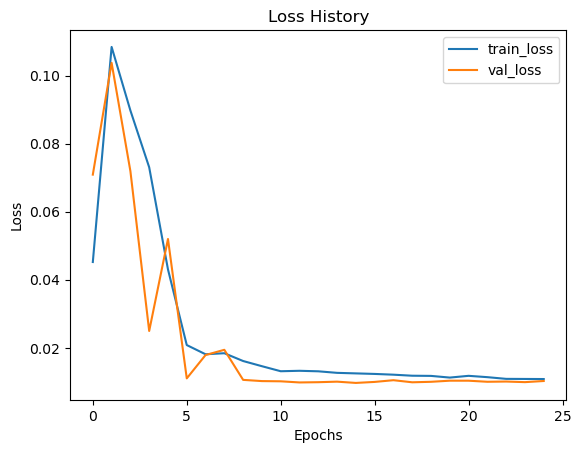

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

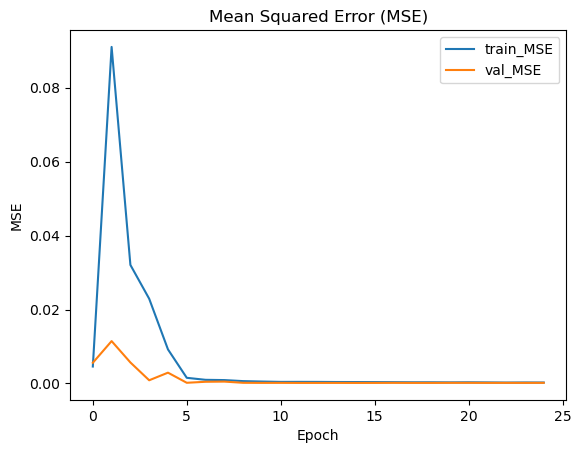

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

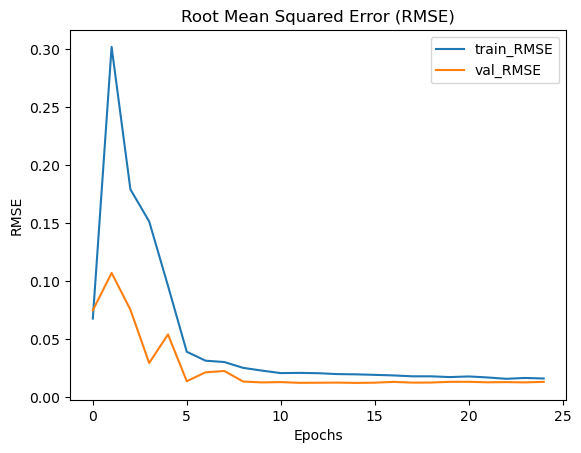

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

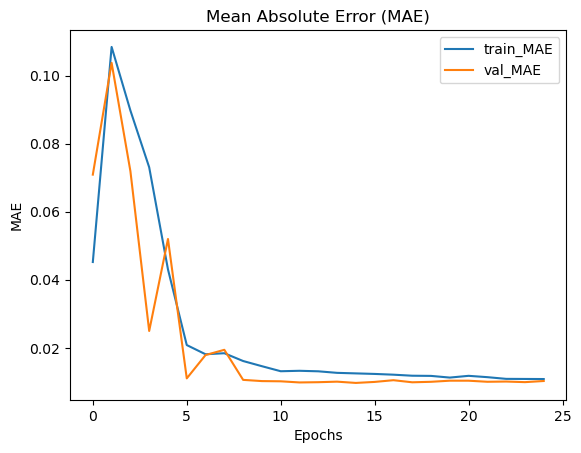

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

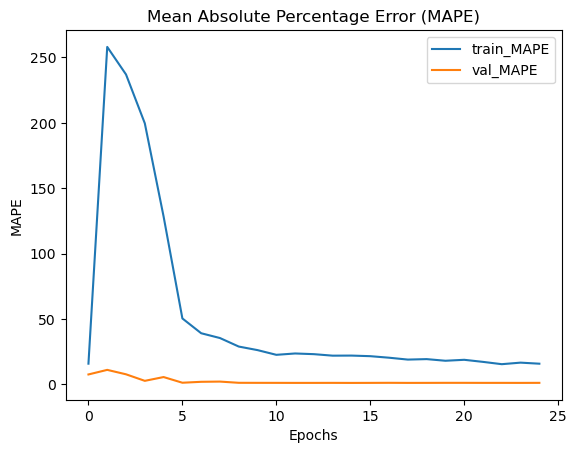

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:09:31.354940: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


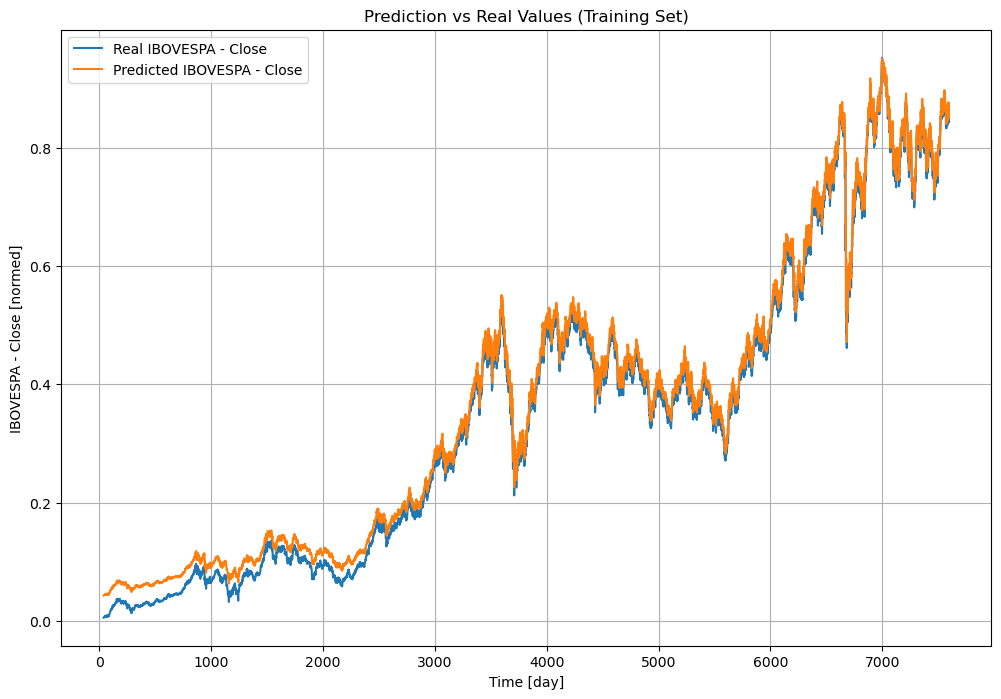

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


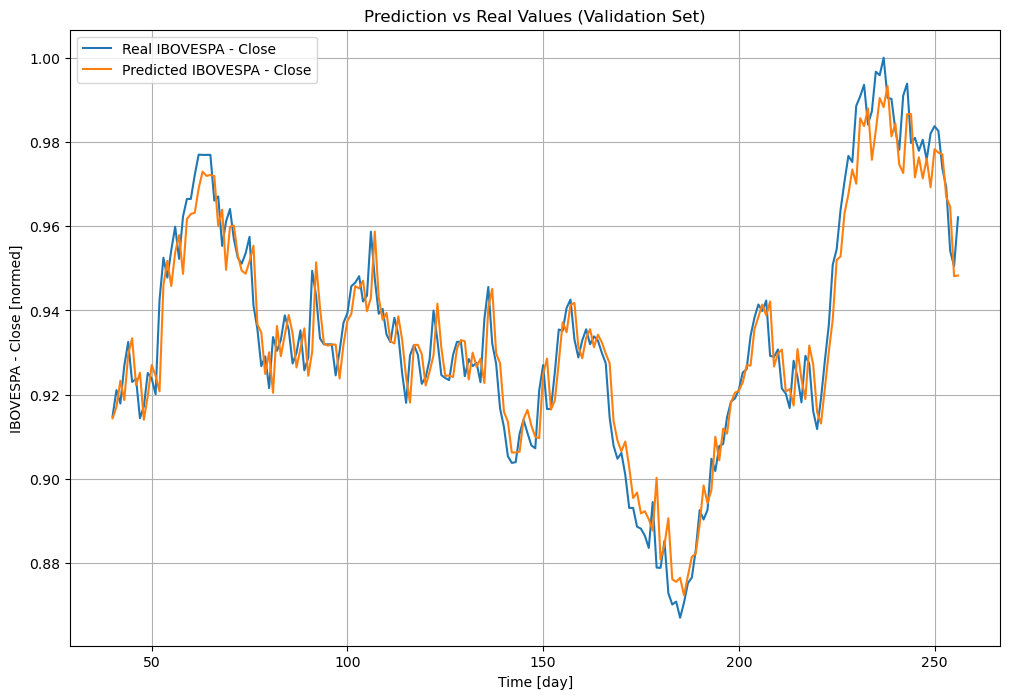

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


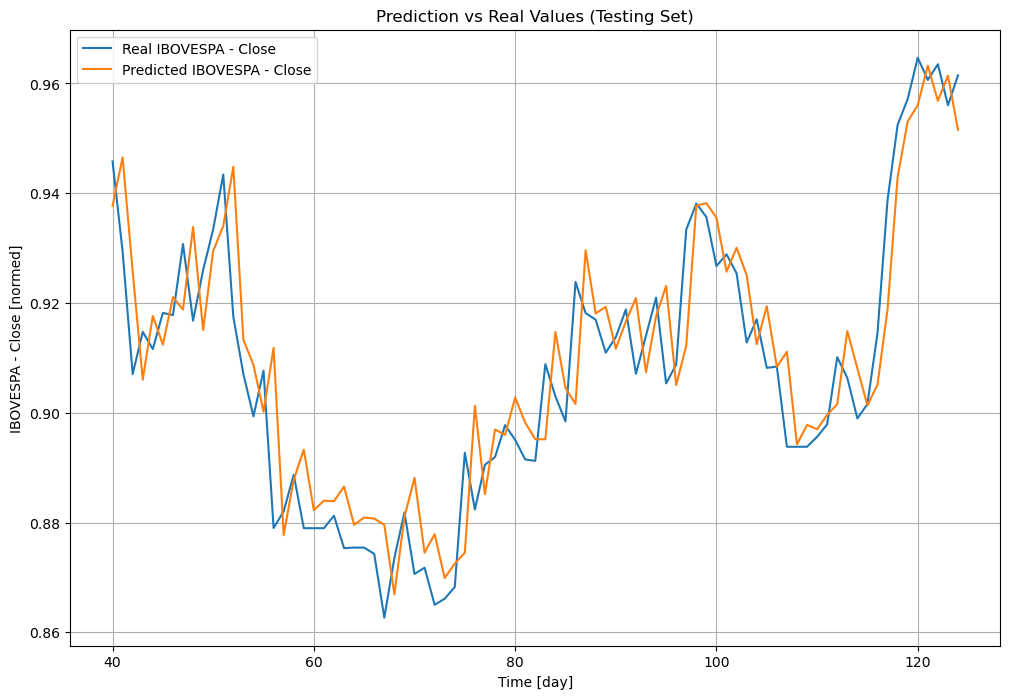

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

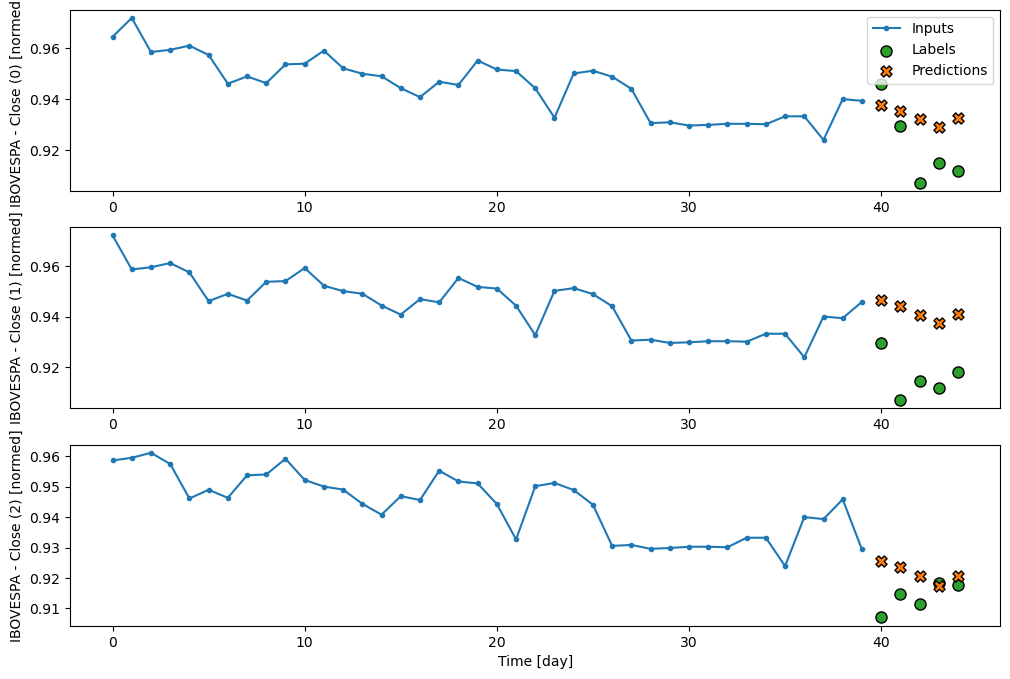

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:0s:433ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


array([[[0.9377029 , 0.9377029 , 0.9377029 , ..., 0.9377029 ,
         0.9377029 , 0.9377029 ],
        [0.9354676 , 0.9354676 , 0.9354676 , ..., 0.9354676 ,
         0.9354676 , 0.9354676 ],
        [0.932086  , 0.932086  , 0.932086  , ..., 0.932086  ,
         0.932086  , 0.932086  ],
        [0.9290626 , 0.9290626 , 0.9290626 , ..., 0.9290626 ,
         0.9290626 , 0.9290626 ],
        [0.93243736, 0.93243736, 0.93243736, ..., 0.93243736,
         0.93243736, 0.93243736]],

       [[0.9465139 , 0.9465139 , 0.9465139 , ..., 0.9465139 ,
         0.9465139 , 0.9465139 ],
        [0.9441819 , 0.9441819 , 0.9441819 , ..., 0.9441819 ,
         0.9441819 , 0.9441819 ],
        [0.9405892 , 0.9405892 , 0.9405892 , ..., 0.9405892 ,
         0.9405892 , 0.9405892 ],
        [0.9375136 , 0.9375136 , 0.9375136 , ..., 0.9375136 ,
         0.9375136 , 0.9375136 ],
        [0.9409555 , 0.9409555 , 0.9409555 , ..., 0.9409555 ,
         0.9409555 , 0.9409555 ]],

       [[0.92573506, 0.92573506, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')